### to-dos

1. add lat lon to sync_data_from_raw
2. add dates to dataframe?

In [1]:
# -*- coding: utf-8 -*-

import os
from datetime import datetime, timedelta
import pylab as pl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as md
# from matplotlib.ticker import MaxNLocator
from scipy import stats
from math import *

### set paths

In [2]:
path_root = os.path.dirname(os.path.dirname(os.getcwd()))
path_gps = os.path.join(path_root, "data", "truck_campaigns_2018_raw", "GPS")
# path_gps_felix = os.path.join(path_gps, "Felix_GPS")
# path_gps_sebastien = os.path.join(path_gps, "Sebastien_GPS")

path_meteo = os.path.join(path_root, "data", "truck_campaigns_2018_raw", "Weather_Station")

path_picarro = os.path.join(path_root, "data", "truck_campaigns_2018_raw", "Picarro")

path_write = os.path.join(path_root, "outputs")

### set time shifts

In [3]:
meteo_time_shift = timedelta(seconds=0)

picarro_time_shift = timedelta(seconds=20)

### select unique Felix GPS data

In [5]:
# files_in_felix_gps = os.listdir(path_gps_felix)
# # print("\nfiles_in_felix_gps:\n", files_in_felix_gps)

# drives_felix_gps = []
# for i in range(len(files_in_felix_gps)):
#     if files_in_felix_gps[i][-4:] == ".csv":
#         drives_felix_gps.append(files_in_felix_gps[i])

# # these contain fully overlapping data
# drives_felix_gps.remove("20180816.csv")
# drives_felix_gps.remove("20180828.csv")
# drives_felix_gps.remove("20180927.csv")
# drives_felix_gps.remove("20181004.csv")
# drives_felix_gps.remove("20181006.csv")
# drives_felix_gps.remove("20181013.csv")

# # these are after Airmar began to be used, so Airmar data was used in Sebastien's sync_data
# drives_felix_gps.remove("20181128.csv")
# drives_felix_gps.remove("20181204.csv")

# print("\ndrives_felix_gps:\n", drives_felix_gps)
# # remaining dates in filenames represent local date at start of each drive

### select Sebastien GPS data

In [6]:
# files_in_sebastien_gps = os.listdir(path_gps_sebastien)

# drives_sebastien_gps = []
# for i in range(len(files_in_sebastien_gps)):
#     if files_in_sebastien_gps[i][-4:] == ".csv":
#         drives_sebastien_gps.append(files_in_sebastien_gps[i])

# # these are after Airmar began to be used, so Airmar data was used in Sebastien's sync_data
# drives_sebastien_gps.remove("Garmin_20181128.csv")
# drives_sebastien_gps.remove("Garmin_20181204.csv")

# print("\ndrives_sebastien_gps:\n", drives_sebastien_gps)

### source combined GPS

use Sebastien's GPS data for all days except 2018-08-17 which is missing

In [4]:
drives_gps = [os.path.join("Sebastien_GPS", "Garmin_20180815.csv"),
              os.path.join("Felix_GPS", "20180817.csv"),
              os.path.join("Sebastien_GPS", "Garmin_20180827.csv"),
              os.path.join("Sebastien_GPS", "Garmin_20180830.csv"),
              os.path.join("Sebastien_GPS", "Garmin_20180926.csv"),
              os.path.join("Sebastien_GPS", "Garmin_20181003.csv"),
              os.path.join("Sebastien_GPS", "Garmin_20181005.csv"),
              os.path.join("Sebastien_GPS", "Garmin_20181012.csv")
             ]

### read selected GPS data

In [5]:
list_dfs_gps = []

for i in range(len(drives_gps)):

    raw_gps = open(os.path.join(path_gps, drives_gps[i]), 'r')
    raw_gps_data = raw_gps.readlines()

    gps_time, gps_time_epoch, lat, lon, alt = [], [], [], [], []

    for j in range(1, len(raw_gps_data)):

        if drives_gps[i][:5] == 'Felix':

            if raw_gps_data[j].split(',')[8] != 'network':

                # format: "2018-08-16T01:54:53.000Z"
                date_time_gps = datetime.strptime( raw_gps_data[j].split(',')[0], '%Y-%m-%dT%H:%M:%S.%fZ' )

                gps_time.append( date_time_gps )
                gps_time_epoch.append( (date_time_gps - datetime(1970,1,1)).total_seconds() )
                lat.append( float(raw_gps_data[j].split(',')[1]) )
                lon.append(	float(raw_gps_data[j].split(',')[2]) )
                alt.append(	float(raw_gps_data[j].split(',')[3]) )
        
        else:	# Sebastien's GPS

            # format: "2018/08/16 01:56:31+00"
            date_time_gps = datetime.strptime( raw_gps_data[j].split(',')[6], '%Y/%m/%d %H:%M:%S+00' )

            gps_time.append( date_time_gps )
            gps_time_epoch.append( (date_time_gps - datetime(1970,1,1)).total_seconds() )
            lat.append( float(raw_gps_data[j].split(',')[1]) )
            lon.append( float(raw_gps_data[j].split(',')[0]) )
            alt.append( float(raw_gps_data[j].split(',')[5]) )

    df_gps = pd.DataFrame({'gps_time_epoch': gps_time_epoch,
                           'lat': lat,
                           'lon': lon,
                           'alt': alt},
                          index=gps_time)
    df_gps.index.name = 'gps_time'

    display(df_gps)

    list_dfs_gps.append(df_gps)

,gps_time_epoch,lat,lon,alt
gps_time,,,,
2018-08-16 01:56:31,1.534385e+09,43.782782,-79.469500,172.399994
2018-08-16 01:56:32,1.534385e+09,43.782750,-79.469496,172.199997
2018-08-16 01:56:40,1.534385e+09,43.782586,-79.469490,172.399994
2018-08-16 01:56:42,1.534385e+09,43.782527,-79.469490,172.199997
2018-08-16 01:56:43,1.534385e+09,43.782492,-79.469484,172.600006
...,...,...,...,...
2018-08-16 08:02:37,1.534407e+09,43.681835,-79.413172,129.600006
2018-08-16 08:02:45,1.534407e+09,43.681838,-79.413139,129.800003
2018-08-16 08:02:47,1.534407e+09,43.681838,-79.413139,129.800003


,gps_time_epoch,lat,lon,alt
gps_time,,,,
2018-08-17 06:45:24.606,1.534488e+09,43.783200,-79.469053,147.382874
2018-08-17 06:45:29.805,1.534488e+09,43.783259,-79.469041,153.497681
2018-08-17 06:45:34.000,1.534488e+09,43.783205,-79.469087,131.367004
2018-08-17 06:45:36.628,1.534488e+09,43.783189,-79.469056,124.661743
2018-08-17 06:45:39.760,1.534488e+09,43.783155,-79.469042,128.638367
...,...,...,...,...
2018-08-17 10:06:42.972,1.534500e+09,43.783170,-79.469038,146.881714
2018-08-17 10:06:46.135,1.534500e+09,43.783170,-79.469038,146.879211
2018-08-17 10:06:49.332,1.534500e+09,43.783170,-79.469038,146.875549


,gps_time_epoch,lat,lon,alt
gps_time,,,,
2018-08-28 04:53:18,1.535432e+09,43.359026,-79.861079,258.799988
2018-08-28 04:53:19,1.535432e+09,43.358916,-79.861196,268.200012
2018-08-28 04:53:20,1.535432e+09,43.358807,-79.861314,283.000000
2018-08-28 04:53:21,1.535432e+09,43.358714,-79.861443,294.399994
2018-08-28 04:53:23,1.535432e+09,43.358520,-79.861724,297.000000
...,...,...,...,...
2018-08-28 10:05:22,1.535451e+09,43.783101,-79.468957,245.800003
2018-08-28 10:05:57,1.535451e+09,43.783101,-79.468953,245.800003
2018-08-28 10:06:05,1.535451e+09,43.783101,-79.468952,245.800003


,gps_time_epoch,lat,lon,alt
gps_time,,,,
2018-08-30 14:45:48,1.535640e+09,43.786912,-79.469973,175.000000
2018-08-30 14:46:00,1.535640e+09,43.786986,-79.469986,174.399994
2018-08-30 14:46:03,1.535640e+09,43.787075,-79.469987,175.000000
2018-08-30 14:46:06,1.535640e+09,43.787267,-79.470072,174.800003
2018-08-30 14:46:07,1.535640e+09,43.787410,-79.470105,174.600006
...,...,...,...,...
2018-08-30 22:55:21,1.535670e+09,43.783206,-79.468962,177.399994
2018-08-30 22:55:22,1.535670e+09,43.783206,-79.468962,177.399994
2018-08-30 22:55:23,1.535670e+09,43.783206,-79.468962,177.399994


,gps_time_epoch,lat,lon,alt
gps_time,,,,
2018-09-27 02:15:32,1.538015e+09,43.780526,-79.468384,211.199997
2018-09-27 02:15:33,1.538015e+09,43.780531,-79.468376,211.399994
2018-09-27 02:15:47,1.538015e+09,43.780516,-79.468384,211.399994
2018-09-27 02:15:52,1.538015e+09,43.780513,-79.468392,211.399994
2018-09-27 02:15:58,1.538015e+09,43.780496,-79.468406,211.399994
...,...,...,...,...
2018-09-27 10:37:57,1.538045e+09,43.783032,-79.468880,188.399994
2018-09-27 10:37:58,1.538045e+09,43.783032,-79.468882,188.399994
2018-09-27 10:37:59,1.538045e+09,43.783030,-79.468882,188.399994


,gps_time_epoch,lat,lon,alt
gps_time,,,,
2018-10-03 18:31:01,1.538591e+09,43.782709,-79.469198,172.399994
2018-10-03 18:31:02,1.538591e+09,43.782693,-79.469266,172.600006
2018-10-03 18:31:06,1.538591e+09,43.782616,-79.469438,172.600006
2018-10-03 18:31:12,1.538591e+09,43.782444,-79.469514,173.399994
2018-10-03 18:31:22,1.538591e+09,43.781889,-79.469392,173.800003
...,...,...,...,...
2018-10-04 04:03:20,1.538626e+09,43.780722,-79.468907,230.000000
2018-10-04 04:03:23,1.538626e+09,43.780727,-79.468904,230.000000
2018-10-04 04:03:30,1.538626e+09,43.780728,-79.468898,230.000000


,gps_time_epoch,lat,lon,alt
gps_time,,,,
2018-10-06 02:32:18,1.538793e+09,43.787297,-79.470837,163.600006
2018-10-06 02:32:19,1.538793e+09,43.787297,-79.470840,163.800003
2018-10-06 02:33:56,1.538793e+09,43.787376,-79.470824,163.199997
2018-10-06 02:34:03,1.538793e+09,43.787376,-79.470820,163.199997
2018-10-06 02:34:07,1.538793e+09,43.787377,-79.470820,163.199997
...,...,...,...,...
2018-10-06 12:11:47,1.538828e+09,43.780382,-79.468324,184.199997
2018-10-06 12:11:52,1.538828e+09,43.780426,-79.468192,183.600006
2018-10-06 12:11:54,1.538828e+09,43.780452,-79.468200,183.399994


,gps_time_epoch,lat,lon,alt
gps_time,,,,
2018-10-13 02:02:16,1.539396e+09,43.787366,-79.470655,163.600006
2018-10-13 02:02:17,1.539396e+09,43.787370,-79.470657,161.800003
2018-10-13 02:02:19,1.539396e+09,43.787367,-79.470658,160.399994
2018-10-13 02:02:23,1.539396e+09,43.787448,-79.470645,161.399994
2018-10-13 02:02:26,1.539396e+09,43.787458,-79.470739,161.800003
...,...,...,...,...
2018-10-13 11:51:07,1.539431e+09,43.749073,-79.462432,151.600006
2018-10-13 11:51:08,1.539431e+09,43.749073,-79.462432,151.600006
2018-10-13 11:51:09,1.539431e+09,43.749073,-79.462432,151.600006


In [6]:
dats_meteo = os.listdir(path_meteo)

# duplicate file, identical to "Meteodata_Campaign20180926"
dats_meteo.remove("Meteodata_Campaign20180927")

print("\ndats_meteo:\n", dats_meteo)


dats_meteo:
 ['Meteodata_Campaign20180815', 'Meteodata_Campaign20180817', 'Meteodata_Campaign20180827', 'Meteodata_Campaign20180830', 'Meteodata_Campaign20180926', 'Meteodata_Campaign20181003', 'Meteodata_Campaign20181005', 'Meteodata_Campaign20181012']


### read meteo data

also find start and end times of meteo data collection on each drive

code adapted from *read_meteo_file* function in *wind_correction_raw_data.ipynb*

In [7]:
local_start_dates_meteo, start_time_meteo, end_time_meteo = [], [], []
list_dfs_meteo = []

for i in range(len(dats_meteo)):

    raw_meteo = open(os.path.join(path_meteo, dats_meteo[i]), 'r')
    raw_meteo_data = raw_meteo.readlines()

    meteo_time, wind_speed, wind_direction, temperature, relative_humidity, pressure = [], [], [], [], [], []

    for j in range(1, len(raw_meteo_data)):

        # format: "2018/08/16 01:50:51"
        date_time_meteo = datetime.strptime( raw_meteo_data[j].split(',')[0], '%Y/%m/%d %H:%M:%S' )

        meteo_time.append(			date_time_meteo + meteo_time_shift )
        wind_speed.append(			float(raw_meteo_data[j].split(',')[1]) )	# m/s
        wind_direction.append(		float(raw_meteo_data[j].split(',')[2]) )	# deg
        temperature.append(			float(raw_meteo_data[j].split(',')[3]) )
        relative_humidity.append(	float(raw_meteo_data[j].split(',')[4]) )
        pressure.append(			float(raw_meteo_data[j].split(',')[5]) )

    df_meteo = pd.DataFrame({'meteo_time': meteo_time,
                             'wind_speed': wind_speed,
                             'wind_direction': wind_direction,
                             'temperature': temperature,
                             'relative_humidity': relative_humidity,
                             'pressure': pressure
                            })

    list_dfs_meteo.append(df_meteo)

    start_time_meteo.append( df_meteo.loc[0, 'meteo_time'] )
    end_time_meteo.append( df_meteo.loc[len(df_meteo.index)-1, 'meteo_time'] )

    local_start_date_meteo = datetime(int(dats_meteo[i][-8:-4]), int(dats_meteo[i][-4:-2]), int(dats_meteo[i][-2:]))
    local_start_dates_meteo.append( local_start_date_meteo )

    df_meteo.set_index("meteo_time", inplace=True)
    display(df_meteo)

df_start_end_meteo = pd.DataFrame({"start_time_meteo": start_time_meteo,
                                  "end_time_meteo": end_time_meteo},
                                 index=local_start_dates_meteo)
print("\ndf_start_end_meteo:")
display(df_start_end_meteo)


,wind_speed,wind_direction,temperature,relative_humidity,pressure
meteo_time,,,,,
2018-08-16 01:50:51,1.5,289.0,26.3,61.0,992.4
2018-08-16 01:50:52,1.4,299.0,26.3,61.0,992.4
2018-08-16 01:50:53,1.4,317.0,26.3,61.0,992.4
2018-08-16 01:50:54,1.5,315.0,26.3,61.0,992.4
2018-08-16 01:50:55,1.5,326.0,26.3,61.0,992.4
...,...,...,...,...,...
2018-08-16 08:30:05,0.4,29.0,21.0,82.0,993.5
2018-08-16 08:30:06,0.3,53.0,21.0,82.0,993.5
2018-08-16 08:30:07,0.3,35.0,21.0,82.0,993.5


,wind_speed,wind_direction,temperature,relative_humidity,pressure
meteo_time,,,,,
2018-08-17 06:39:24,1.1,213.0,23.0,86.0,991.8
2018-08-17 06:39:25,1.2,220.0,22.9,86.0,991.8
2018-08-17 06:39:26,1.3,217.0,22.9,86.0,991.8
2018-08-17 06:39:27,1.1,227.0,22.9,86.0,991.8
2018-08-17 06:39:28,1.0,224.0,22.9,86.0,991.8
...,...,...,...,...,...
2018-08-17 10:05:41,1.8,165.0,22.4,95.0,990.7
2018-08-17 10:05:42,2.3,158.0,22.4,95.0,990.7
2018-08-17 10:05:43,2.3,159.0,22.4,95.0,990.7


,wind_speed,wind_direction,temperature,relative_humidity,pressure
meteo_time,,,,,
2018-08-28 03:21:07,1.3,247.0,26.8,74.0,991.4
2018-08-28 03:21:08,1.2,239.0,26.8,74.0,991.4
2018-08-28 03:21:09,1.0,219.0,26.8,74.0,991.4
2018-08-28 03:21:10,0.8,215.0,26.8,74.0,991.4
2018-08-28 03:21:11,0.8,221.0,26.8,74.0,991.4
...,...,...,...,...,...
2018-08-28 10:09:28,1.4,238.0,24.3,83.0,990.4
2018-08-28 10:09:29,1.6,241.0,24.3,83.0,990.4
2018-08-28 10:09:30,1.8,244.0,24.3,83.0,990.4


,wind_speed,wind_direction,temperature,relative_humidity,pressure
meteo_time,,,,,
2018-08-30 14:39:44,1.0,354.0,17.3,69.0,1000.6
2018-08-30 14:39:45,1.1,354.0,17.3,69.0,1000.6
2018-08-30 14:39:46,1.4,8.0,17.3,69.0,1000.6
2018-08-30 14:39:47,1.5,30.0,17.3,69.0,1000.6
2018-08-30 14:39:48,1.7,35.0,17.3,69.0,1000.6
...,...,...,...,...,...
2018-08-30 22:57:47,0.5,0.0,18.5,65.0,1000.2
2018-08-30 22:57:48,0.5,350.0,18.5,65.0,1000.2
2018-08-30 22:57:49,0.6,353.0,18.5,65.0,1000.2


,wind_speed,wind_direction,temperature,relative_humidity,pressure
meteo_time,,,,,
2018-09-27 02:14:17,0.5,132.0,14.4,64.0,996.0
2018-09-27 02:14:18,0.4,113.0,14.4,64.0,996.0
2018-09-27 02:14:19,0.3,117.0,14.4,64.0,996.0
2018-09-27 02:14:20,0.4,136.0,14.4,64.0,996.0
2018-09-27 02:14:21,0.5,151.0,14.4,64.0,996.0
...,...,...,...,...,...
2018-09-27 10:30:26,0.3,103.0,8.5,90.0,998.7
2018-09-27 10:30:27,0.1,125.0,8.5,90.0,998.7
2018-09-27 10:30:28,0.2,165.0,8.5,90.0,998.7


,wind_speed,wind_direction,temperature,relative_humidity,pressure
meteo_time,,,,,
2018-10-03 18:22:17,0.7,142.0,16.6,66.0,995.9
2018-10-03 18:22:18,0.8,144.0,16.6,66.0,995.9
2018-10-03 18:22:19,1.0,138.0,16.6,66.0,995.9
2018-10-03 18:23:31,1.0,141.0,16.4,67.0,995.9
2018-10-03 18:23:32,1.0,146.0,16.4,67.0,995.9
...,...,...,...,...,...
2018-10-04 03:58:36,0.7,139.0,15.0,93.0,988.4
2018-10-04 03:58:37,0.8,132.0,15.0,93.0,988.4
2018-10-04 03:58:38,0.7,135.0,15.0,93.0,988.4


,wind_speed,wind_direction,temperature,relative_humidity,pressure
meteo_time,,,,,
2018-10-06 01:59:42,1.2,134.0,10.3,59.0,997.6
2018-10-06 01:59:43,1.0,138.0,10.3,59.0,997.6
2018-10-06 01:59:44,1.0,137.0,10.3,59.0,997.6
2018-10-06 01:59:45,0.9,140.0,10.3,59.0,997.6
2018-10-06 01:59:46,0.8,134.0,10.3,59.0,997.5
...,...,...,...,...,...
2018-10-06 12:13:46,1.0,189.0,8.3,92.0,995.3
2018-10-06 12:13:47,1.0,189.0,8.3,92.0,995.3
2018-10-06 12:13:48,1.1,191.0,8.3,92.0,995.3


,wind_speed,wind_direction,temperature,relative_humidity,pressure
meteo_time,,,,,
2018-10-13 01:40:22,0.8,216.0,7.7,66.0,987.0
2018-10-13 01:40:22,1.1,222.0,7.7,66.0,987.0
2018-10-13 01:40:23,1.2,217.0,7.7,66.0,987.0
2018-10-13 01:40:24,1.1,203.0,7.7,66.0,987.0
2018-10-13 01:40:25,1.1,199.0,7.7,66.0,987.0
...,...,...,...,...,...
2018-10-13 11:18:20,1.1,277.0,5.3,85.0,987.9
2018-10-13 11:18:21,1.2,282.0,5.3,85.0,988.0
2018-10-13 11:18:22,1.4,284.0,5.3,85.0,988.0



df_start_end_meteo:


,start_time_meteo,end_time_meteo
2018-08-15,2018-08-16 01:50:51,2018-08-16 08:30:09
2018-08-17,2018-08-17 06:39:24,2018-08-17 10:05:45
2018-08-27,2018-08-28 03:21:07,2018-08-28 10:09:32
2018-08-30,2018-08-30 14:39:44,2018-08-30 22:57:51
2018-09-26,2018-09-27 02:14:17,2018-09-27 10:30:30
2018-10-03,2018-10-03 18:22:17,2018-10-04 03:58:40
2018-10-05,2018-10-06 01:59:42,2018-10-06 12:13:50
2018-10-12,2018-10-13 01:40:22,2018-10-13 11:18:24


### calculate car speed and direction

In [8]:
# loop through each gps df
# loop through each meteo df
# sample adjacent lat/lon data to calculate car speed and direction at each meteo_time

R_earth = 6371000		# radius of Earth, in m

for i in range(len(list_dfs_gps)):
# for i in range(2):

    car_speed, car_dir = [], []

    # same number of files for gps and meteo data, with matching dates in the filenames
    df_gps = list_dfs_gps[i]
    df_meteo = list_dfs_meteo[i]
#     display(df_gps)
#     display(df_meteo)

    # set up starting j and k
    # =======================

    j = 0		# meteo time index
    k = 0		# gps time index

    # in case meteo data starts before gps data (don't want to extrapolate)
    while df_meteo.index[j] < df_gps.index[0]:
        car_speed.append(np.nan)
        car_dir.append(np.nan)
        j += 1

    while df_gps.index[k] < df_meteo.index[j]:
        k += 1
#     print(df_gps.index[k-1], df_meteo.index[j], df_gps.index[k], '\n', sep='\n')

    # calculate car speed & direction
    # ===============================
    
    while (j < len(df_meteo.index)) and (df_meteo.index[j] < df_gps.index[-1]):

        while (j < len(df_meteo.index)) and (df_meteo.index[j] < df_gps.index[k]):

            gps_time_L = df_gps.index[k-1]
            gps_time_R = df_gps.index[k]
            lat_L = radians(df_gps.loc[gps_time_L, "lat"])
            lat_R = radians(df_gps.loc[gps_time_R, "lat"])
            lon_L = radians(df_gps.loc[gps_time_L, "lon"])
            lon_R = radians(df_gps.loc[gps_time_R, "lon"])

            dlat = lat_R - lat_L
            dlon = lon_R - lon_L

            # distance travelled between 2 data points, in m
            a = sin(dlat / 2)**2 + cos(lat_L) * cos(lat_R) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            dist = R_earth * c

            # time passed between 2 data points, in s
            dtime = (gps_time_R - gps_time_L).total_seconds()

            # car speed, in m/s
            car_speed.append( dist / dtime )

            # car heading, in degrees
            Y = sin(dlon) * cos(lat_R)
            X = cos(lat_L) * sin(lat_R) - sin(lat_L) * cos(lat_R) * cos(dlon)
            car_dir.append((degrees(atan2(Y, X)) + 360) % 360)

            j += 1

        k += 1

    # in case meteo data ends after gps data (don't want to extrapolate)
    while (j < len(df_meteo.index)) and (df_meteo.index[j] >= df_gps.index[-1]):
        car_speed.append(np.nan)
        car_dir.append(np.nan)
        j += 1

    print("df_meteo.index[-1]:", df_meteo.index[-1])
    print("df_gps.index[-1]:", df_gps.index[-1])

#     test_df = pd.DataFrame({'car_speed': car_speed, 'car_direction': car_dir})
#     test_df.to_csv(os.path.join(path_root, "scratch", "test_car_df.csv"), index=False)

    list_dfs_meteo[i]["car_speed"] = car_speed
    list_dfs_meteo[i]["car_direction"] = car_dir

    display(list_dfs_meteo[i])

df_meteo.index[-1]: 2018-08-16 08:30:09
df_gps.index[-1]: 2018-08-16 08:02:57


,wind_speed,wind_direction,temperature,relative_humidity,pressure,car_speed,car_direction
meteo_time,,,,,,,
2018-08-16 01:50:51,1.5,289.0,26.3,61.0,992.4,NaN,NaN
2018-08-16 01:50:52,1.4,299.0,26.3,61.0,992.4,NaN,NaN
2018-08-16 01:50:53,1.4,317.0,26.3,61.0,992.4,NaN,NaN
2018-08-16 01:50:54,1.5,315.0,26.3,61.0,992.4,NaN,NaN
2018-08-16 01:50:55,1.5,326.0,26.3,61.0,992.4,NaN,NaN
...,...,...,...,...,...,...,...
2018-08-16 08:30:05,0.4,29.0,21.0,82.0,993.5,NaN,NaN
2018-08-16 08:30:06,0.3,53.0,21.0,82.0,993.5,NaN,NaN
2018-08-16 08:30:07,0.3,35.0,21.0,82.0,993.5,NaN,NaN


df_meteo.index[-1]: 2018-08-17 10:05:45
df_gps.index[-1]: 2018-08-17 10:06:55.630000


,wind_speed,wind_direction,temperature,relative_humidity,pressure,car_speed,car_direction
meteo_time,,,,,,,
2018-08-17 06:39:24,1.1,213.0,23.0,86.0,991.8,NaN,NaN
2018-08-17 06:39:25,1.2,220.0,22.9,86.0,991.8,NaN,NaN
2018-08-17 06:39:26,1.3,217.0,22.9,86.0,991.8,NaN,NaN
2018-08-17 06:39:27,1.1,227.0,22.9,86.0,991.8,NaN,NaN
2018-08-17 06:39:28,1.0,224.0,22.9,86.0,991.8,NaN,NaN
...,...,...,...,...,...,...,...
2018-08-17 10:05:41,1.8,165.0,22.4,95.0,990.7,0.063461,235.295235
2018-08-17 10:05:42,2.3,158.0,22.4,95.0,990.7,0.063461,235.295235
2018-08-17 10:05:43,2.3,159.0,22.4,95.0,990.7,0.075202,199.848655


df_meteo.index[-1]: 2018-08-28 10:09:32
df_gps.index[-1]: 2018-08-28 10:06:31


,wind_speed,wind_direction,temperature,relative_humidity,pressure,car_speed,car_direction
meteo_time,,,,,,,
2018-08-28 03:21:07,1.3,247.0,26.8,74.0,991.4,NaN,NaN
2018-08-28 03:21:08,1.2,239.0,26.8,74.0,991.4,NaN,NaN
2018-08-28 03:21:09,1.0,219.0,26.8,74.0,991.4,NaN,NaN
2018-08-28 03:21:10,0.8,215.0,26.8,74.0,991.4,NaN,NaN
2018-08-28 03:21:11,0.8,221.0,26.8,74.0,991.4,NaN,NaN
...,...,...,...,...,...,...,...
2018-08-28 10:09:28,1.4,238.0,24.3,83.0,990.4,NaN,NaN
2018-08-28 10:09:29,1.6,241.0,24.3,83.0,990.4,NaN,NaN
2018-08-28 10:09:30,1.8,244.0,24.3,83.0,990.4,NaN,NaN


df_meteo.index[-1]: 2018-08-30 22:57:51
df_gps.index[-1]: 2018-08-30 22:55:26


,wind_speed,wind_direction,temperature,relative_humidity,pressure,car_speed,car_direction
meteo_time,,,,,,,
2018-08-30 14:39:44,1.0,354.0,17.3,69.0,1000.6,NaN,NaN
2018-08-30 14:39:45,1.1,354.0,17.3,69.0,1000.6,NaN,NaN
2018-08-30 14:39:46,1.4,8.0,17.3,69.0,1000.6,NaN,NaN
2018-08-30 14:39:47,1.5,30.0,17.3,69.0,1000.6,NaN,NaN
2018-08-30 14:39:48,1.7,35.0,17.3,69.0,1000.6,NaN,NaN
...,...,...,...,...,...,...,...
2018-08-30 22:57:47,0.5,0.0,18.5,65.0,1000.2,NaN,NaN
2018-08-30 22:57:48,0.5,350.0,18.5,65.0,1000.2,NaN,NaN
2018-08-30 22:57:49,0.6,353.0,18.5,65.0,1000.2,NaN,NaN


df_meteo.index[-1]: 2018-09-27 10:30:30
df_gps.index[-1]: 2018-09-27 10:38:12


,wind_speed,wind_direction,temperature,relative_humidity,pressure,car_speed,car_direction
meteo_time,,,,,,,
2018-09-27 02:14:17,0.5,132.0,14.4,64.0,996.0,NaN,NaN
2018-09-27 02:14:18,0.4,113.0,14.4,64.0,996.0,NaN,NaN
2018-09-27 02:14:19,0.3,117.0,14.4,64.0,996.0,NaN,NaN
2018-09-27 02:14:20,0.4,136.0,14.4,64.0,996.0,NaN,NaN
2018-09-27 02:14:21,0.5,151.0,14.4,64.0,996.0,NaN,NaN
...,...,...,...,...,...,...,...
2018-09-27 10:30:26,0.3,103.0,8.5,90.0,998.7,0.231592,332.297580
2018-09-27 10:30:27,0.1,125.0,8.5,90.0,998.7,0.135812,174.313152
2018-09-27 10:30:28,0.2,165.0,8.5,90.0,998.7,0.135812,174.313152


df_meteo.index[-1]: 2018-10-04 03:58:40
df_gps.index[-1]: 2018-10-04 04:04:07


,wind_speed,wind_direction,temperature,relative_humidity,pressure,car_speed,car_direction
meteo_time,,,,,,,
2018-10-03 18:22:17,0.7,142.0,16.6,66.0,995.9,NaN,NaN
2018-10-03 18:22:18,0.8,144.0,16.6,66.0,995.9,NaN,NaN
2018-10-03 18:22:19,1.0,138.0,16.6,66.0,995.9,NaN,NaN
2018-10-03 18:23:31,1.0,141.0,16.4,67.0,995.9,NaN,NaN
2018-10-03 18:23:32,1.0,146.0,16.4,67.0,995.9,NaN,NaN
...,...,...,...,...,...,...,...
2018-10-04 03:58:36,0.7,139.0,15.0,93.0,988.4,0.0,0.0
2018-10-04 03:58:37,0.8,132.0,15.0,93.0,988.4,0.0,0.0
2018-10-04 03:58:38,0.7,135.0,15.0,93.0,988.4,0.0,0.0


df_meteo.index[-1]: 2018-10-06 12:13:50
df_gps.index[-1]: 2018-10-06 12:12:02


,wind_speed,wind_direction,temperature,relative_humidity,pressure,car_speed,car_direction
meteo_time,,,,,,,
2018-10-06 01:59:42,1.2,134.0,10.3,59.0,997.6,NaN,NaN
2018-10-06 01:59:43,1.0,138.0,10.3,59.0,997.6,NaN,NaN
2018-10-06 01:59:44,1.0,137.0,10.3,59.0,997.6,NaN,NaN
2018-10-06 01:59:45,0.9,140.0,10.3,59.0,997.6,NaN,NaN
2018-10-06 01:59:46,0.8,134.0,10.3,59.0,997.5,NaN,NaN
...,...,...,...,...,...,...,...
2018-10-06 12:13:46,1.0,189.0,8.3,92.0,995.3,NaN,NaN
2018-10-06 12:13:47,1.0,189.0,8.3,92.0,995.3,NaN,NaN
2018-10-06 12:13:48,1.1,191.0,8.3,92.0,995.3,NaN,NaN


df_meteo.index[-1]: 2018-10-13 11:18:24
df_gps.index[-1]: 2018-10-13 11:51:22


,wind_speed,wind_direction,temperature,relative_humidity,pressure,car_speed,car_direction
meteo_time,,,,,,,
2018-10-13 01:40:22,0.8,216.0,7.7,66.0,987.0,NaN,NaN
2018-10-13 01:40:22,1.1,222.0,7.7,66.0,987.0,NaN,NaN
2018-10-13 01:40:23,1.2,217.0,7.7,66.0,987.0,NaN,NaN
2018-10-13 01:40:24,1.1,203.0,7.7,66.0,987.0,NaN,NaN
2018-10-13 01:40:25,1.1,199.0,7.7,66.0,987.0,NaN,NaN
...,...,...,...,...,...,...,...
2018-10-13 11:18:20,1.1,277.0,5.3,85.0,987.9,0.017859,262.223793
2018-10-13 11:18:21,1.2,282.0,5.3,85.0,988.0,0.017859,262.223793
2018-10-13 11:18:22,1.4,284.0,5.3,85.0,988.0,0.017859,262.223793


### generate list of dates in string form

In [9]:
print("\ndates:\n", local_start_dates_meteo)

date_strs, date_strs_compact = [], []

for i in range(len(local_start_dates_meteo)):
    date_str = local_start_dates_meteo[i].strftime("%Y-%m-%d")
    date_strs.append(date_str)
#     date_str_compact = local_start_dates_meteo[i].strftime("%Y%m%d")
#     date_strs_compact.append(date_str_compact)

print("\ndate_strs:\n", date_strs)
# print("\ndate_strs_compact:\n", date_strs_compact)


dates:
 [datetime.datetime(2018, 8, 15, 0, 0), datetime.datetime(2018, 8, 17, 0, 0), datetime.datetime(2018, 8, 27, 0, 0), datetime.datetime(2018, 8, 30, 0, 0), datetime.datetime(2018, 9, 26, 0, 0), datetime.datetime(2018, 10, 3, 0, 0), datetime.datetime(2018, 10, 5, 0, 0), datetime.datetime(2018, 10, 12, 0, 0)]

date_strs:
 ['2018-08-15', '2018-08-17', '2018-08-27', '2018-08-30', '2018-09-26', '2018-10-03', '2018-10-05', '2018-10-12']


### plot car speed over time

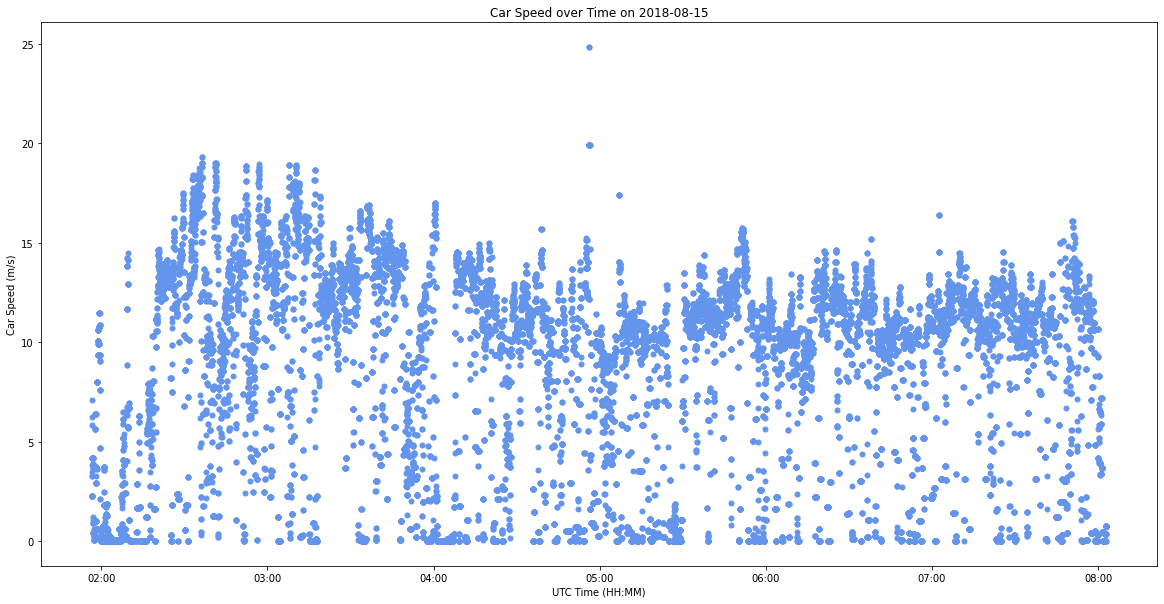

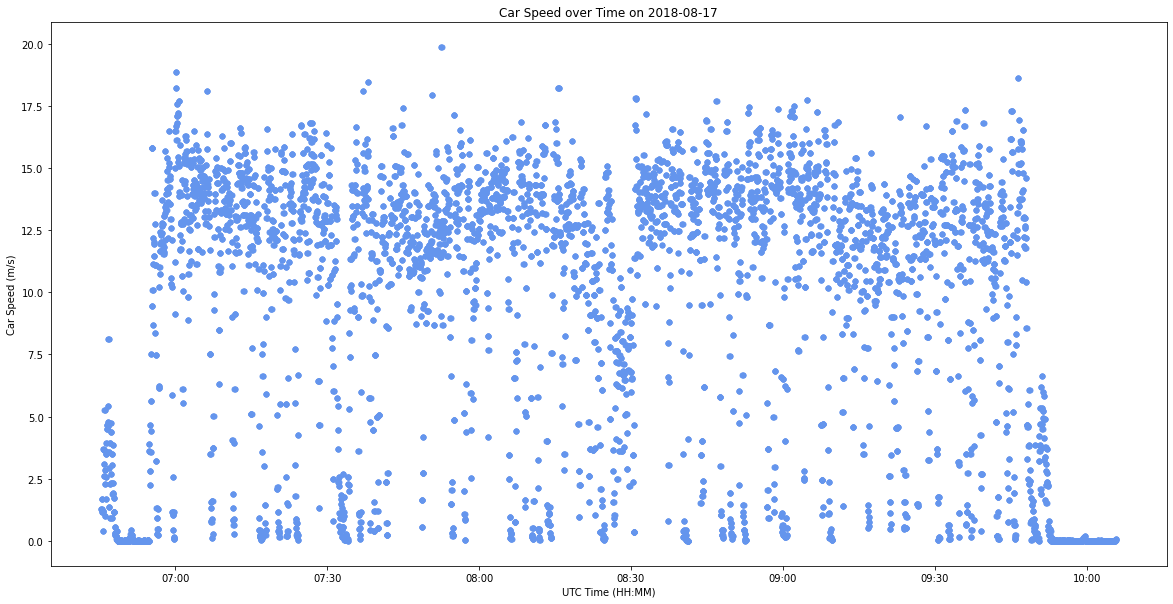

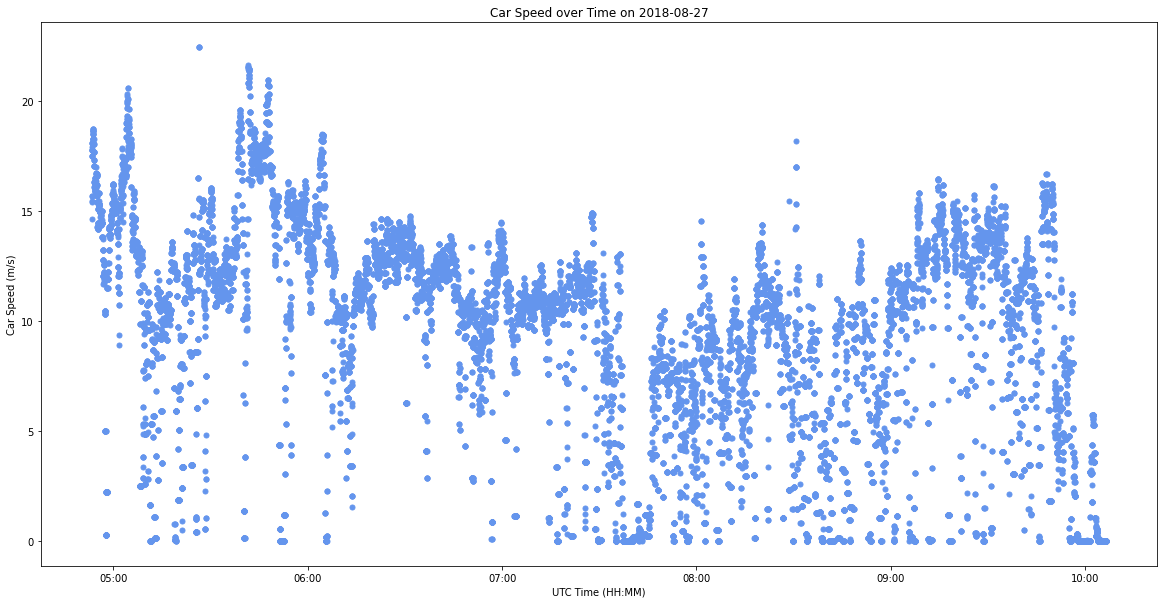

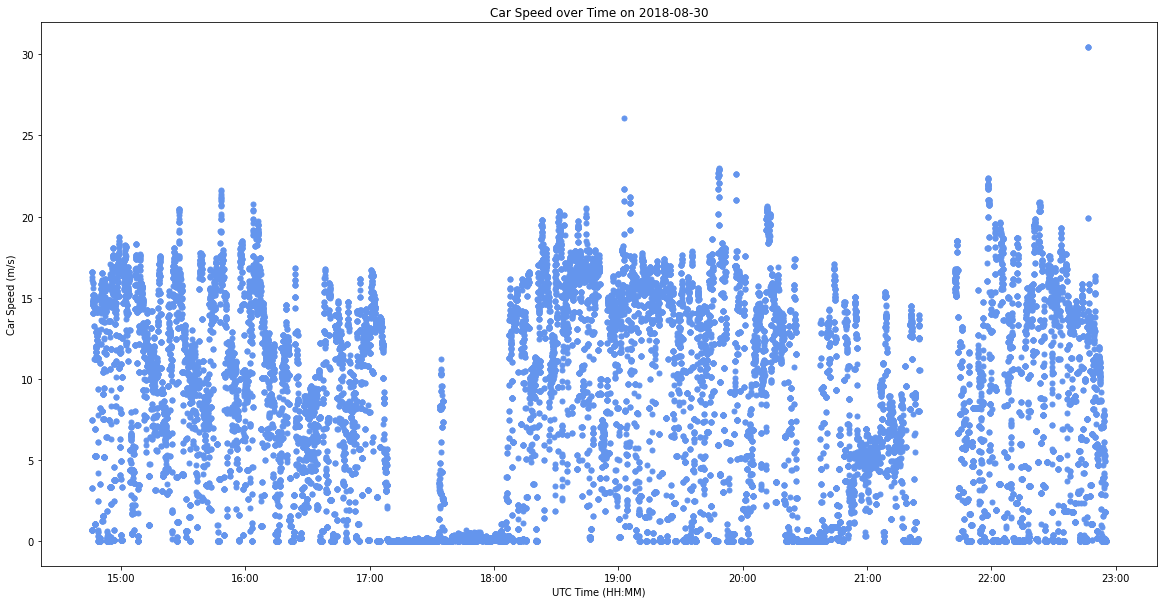

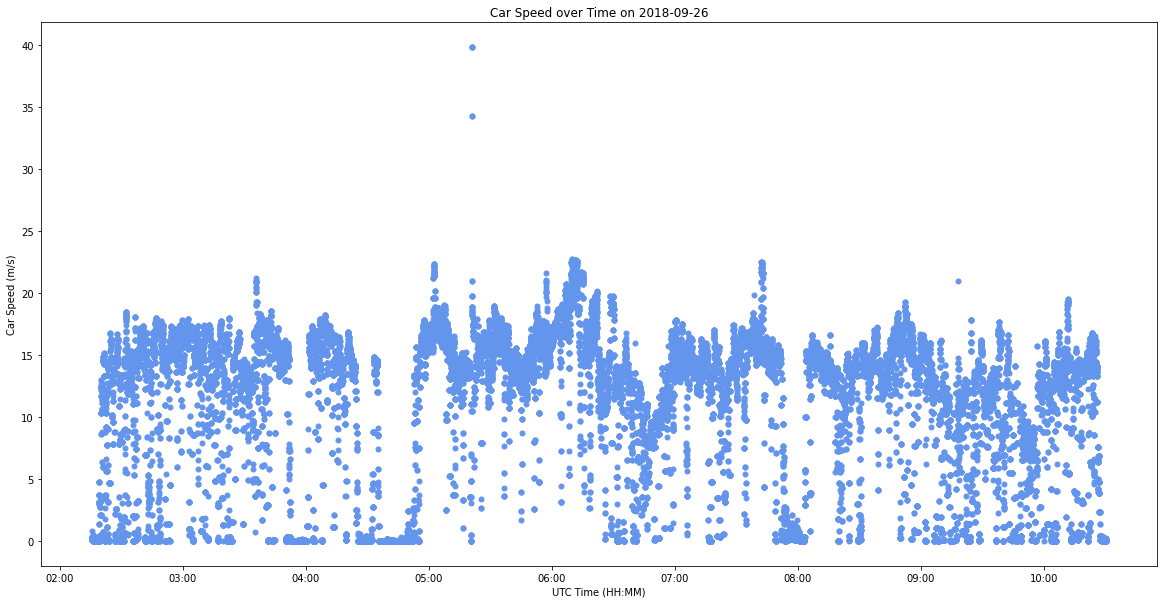

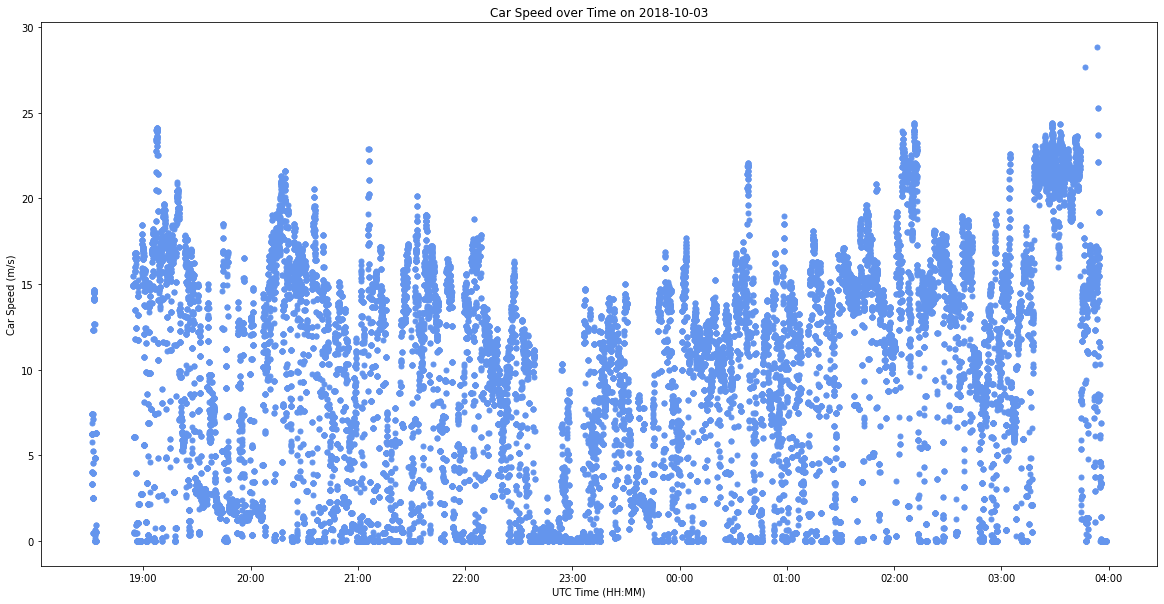

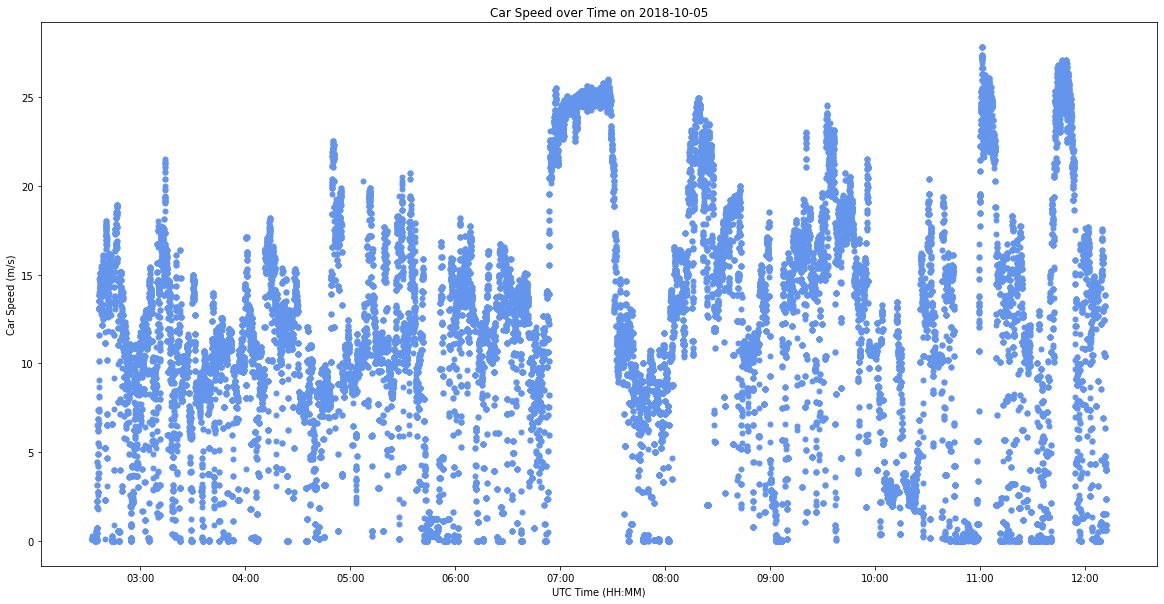

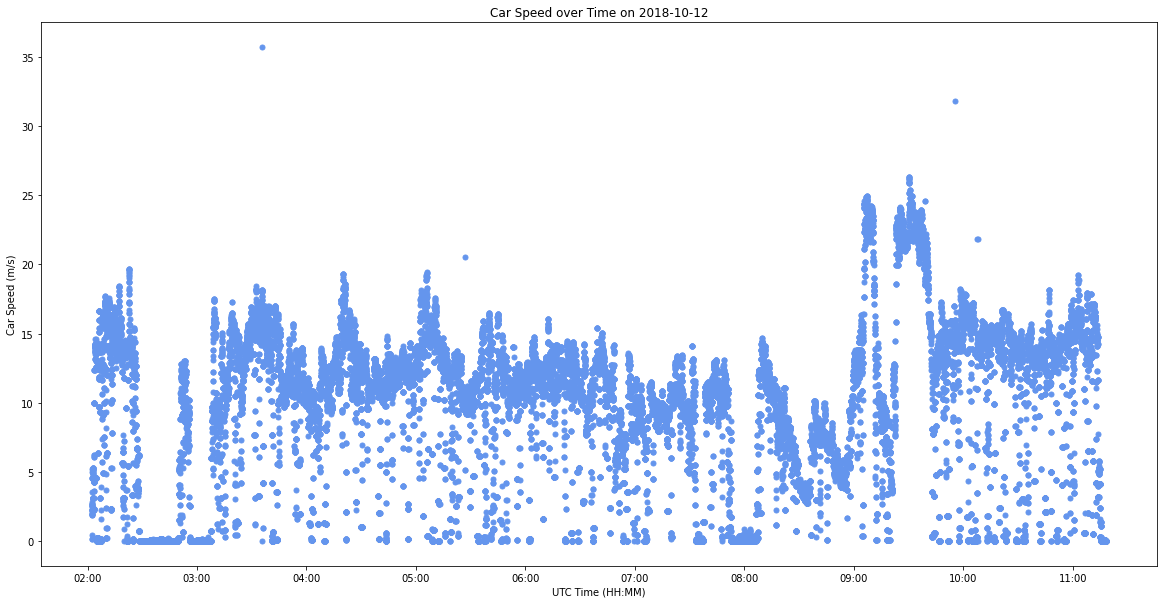

In [10]:
for i in range(len(date_strs)):
# for i in range(2):

    df_meteo = list_dfs_meteo[i]

    fig_corr_speed_time = plt.figure(figsize=(20,10))

    time_ax = md.date2num(df_meteo.index)
    car_speed = df_meteo.loc[:, "car_speed"]
    plt.plot_date(time_ax, car_speed, 'o', label='car speed', color='cornflowerblue', markersize=5)

    ax = plt.gca()
    ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

    plt.title("Car Speed over Time on " + date_strs[i])
    plt.xlabel("UTC Time (HH:MM)")
    plt.ylabel("Car Speed (m/s)")

### plot car direction over time

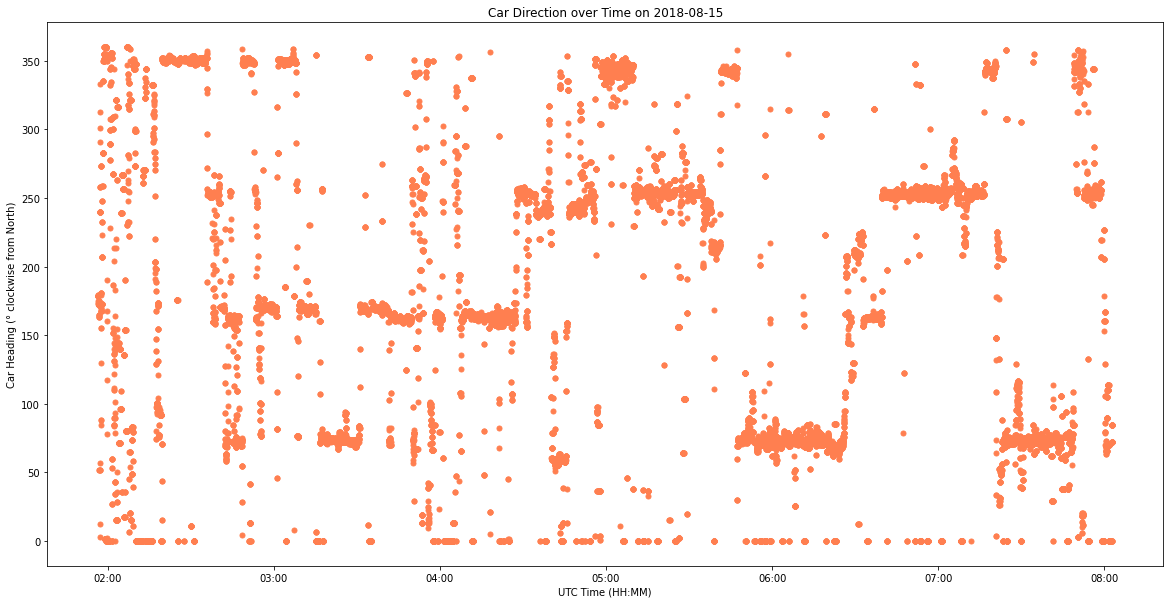

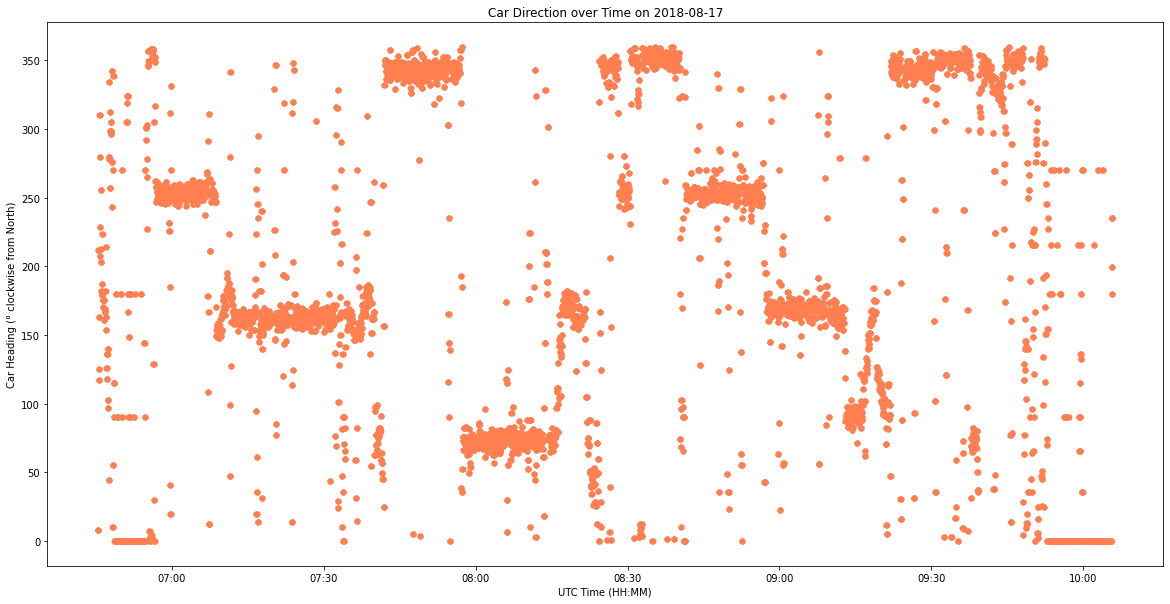

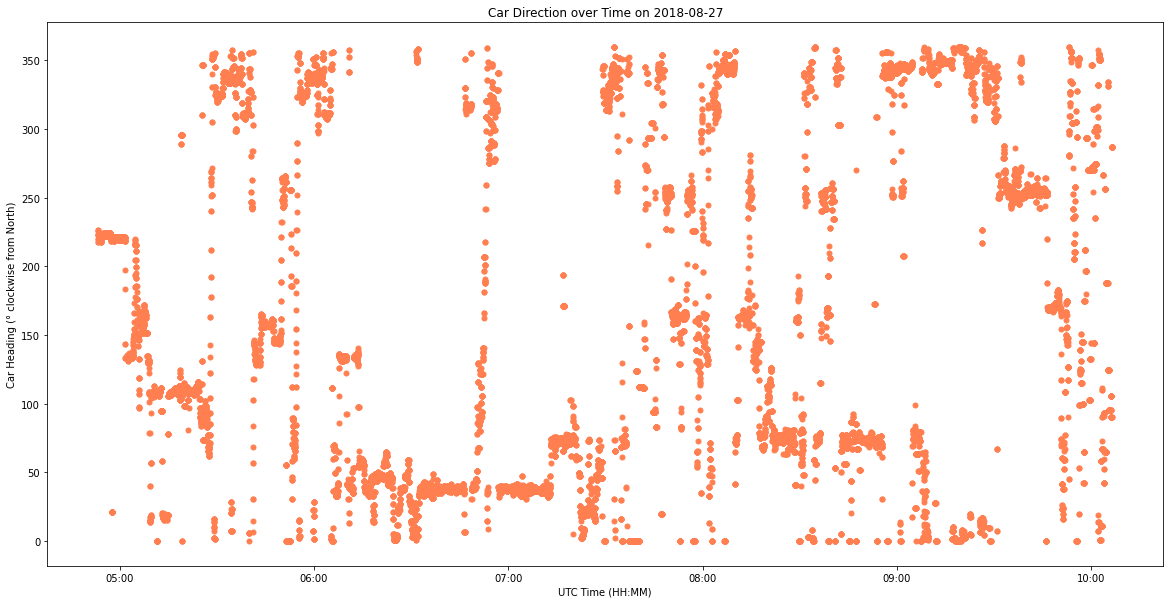

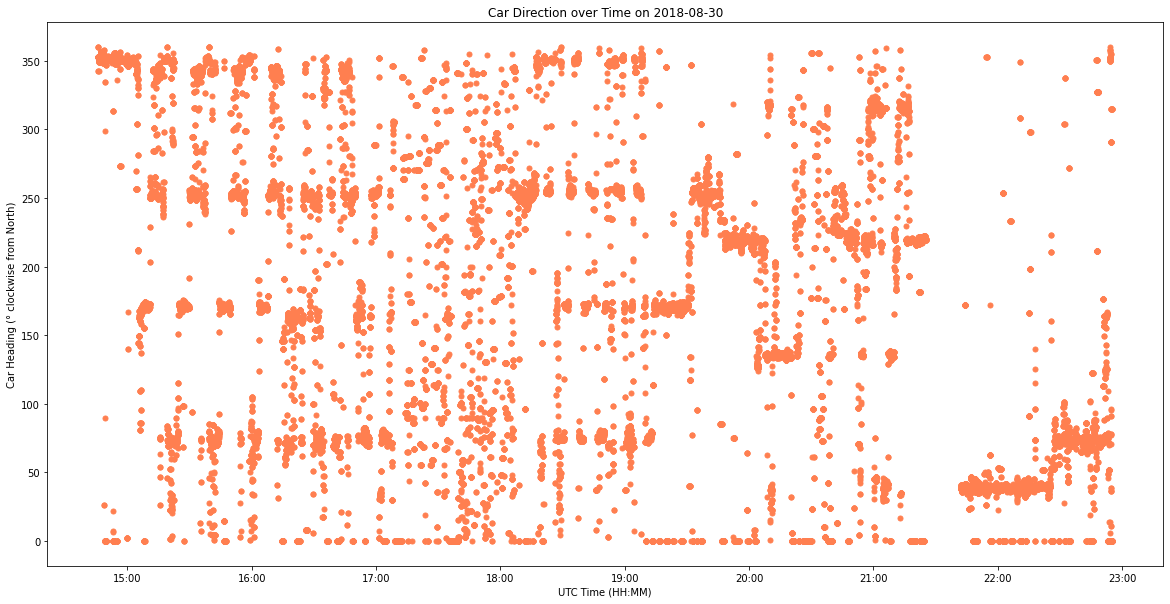

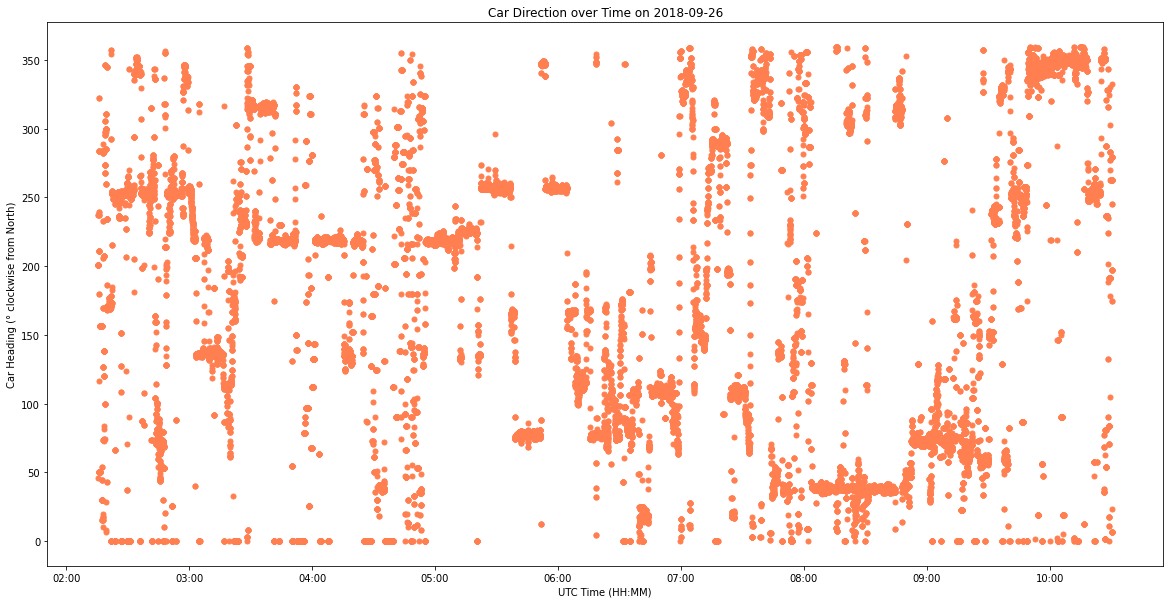

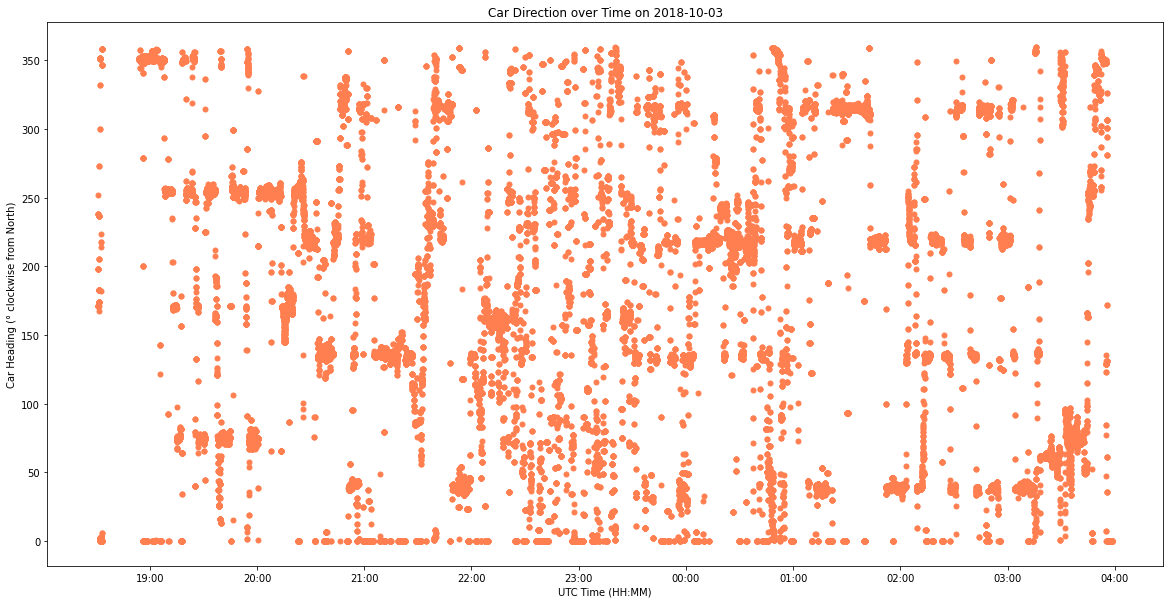

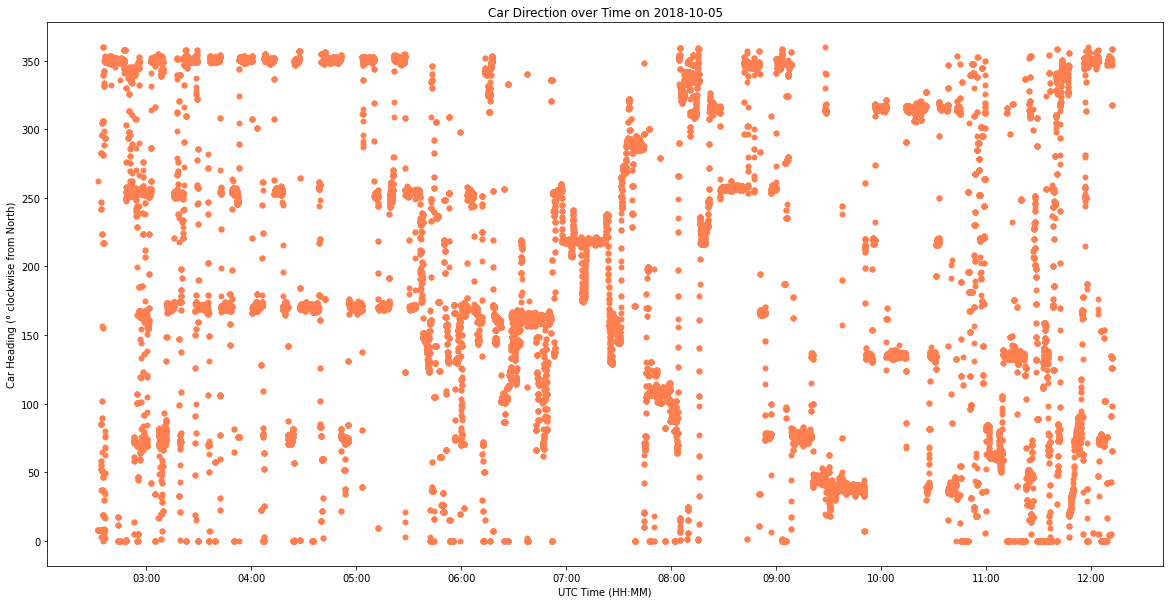

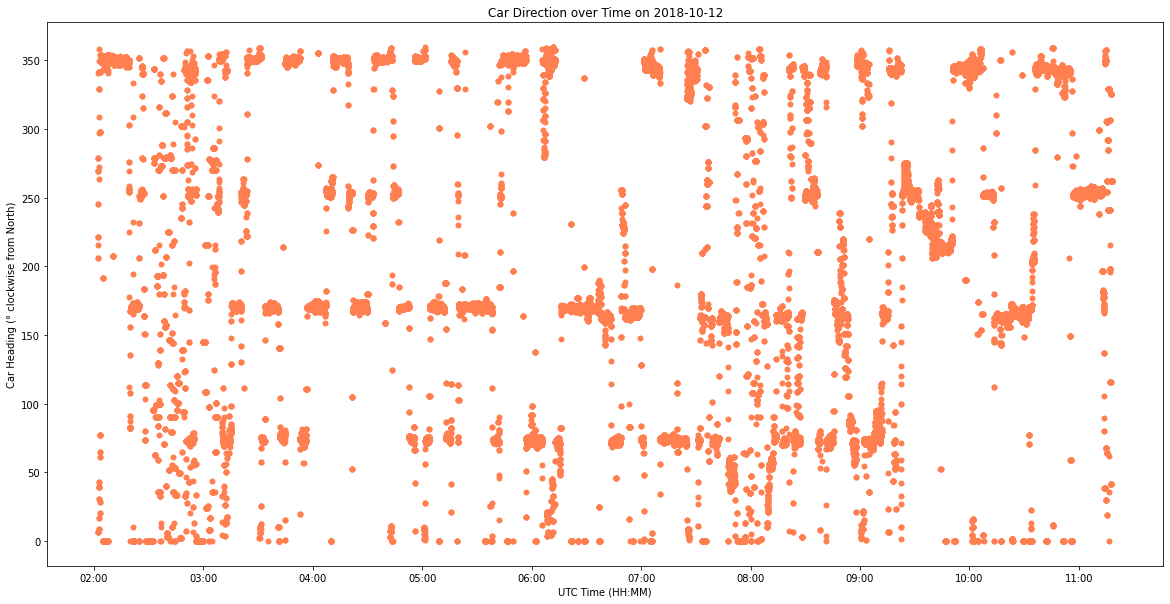

In [11]:
for i in range(len(date_strs)):

    df_meteo = list_dfs_meteo[i]

    fig_corr_speed_time = plt.figure(figsize=(20,10))

    time_ax = md.date2num(df_meteo.index)
    car_speed = df_meteo.loc[:, "car_direction"]
    plt.plot_date(time_ax, car_speed, 'o', label='car direction', color='coral', markersize=5)

    ax = plt.gca()
    ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

    plt.title("Car Direction over Time on " + date_strs[i])
    plt.xlabel("UTC Time (HH:MM)")
    plt.ylabel("Car Heading (° clockwise from North)")

### write car motion to files

In [12]:
write_car_motion_to_file = False

if write_car_motion_to_file == True:
    try:
        os.makedirs(os.path.join(path_write, "car_motion_from_raw"))
    except OSError:
        pass

    for i in range(len(date_strs)):

        car_motion_filename = os.path.join(path_write, "car_motion_from_raw", "car_motion_" + date_strs[i] + ".csv")

        list_dfs_meteo[i].to_csv(car_motion_filename, index=True)

### calculate calibration factor

data collected in lab

In [14]:
# campaign 1
path_calib = os.path.join(path_root, "data", "truck_campaigns_2018_raw", "Picarro", "20180814")
file_calib = "CFADS59-20180814-1433-Data.dat"

# beginning = '15:07:00'
# ending = '15:47:00'
start_end_hr = 15
start_min = 7
end_min = 47

tanks = [['HIGH', 2.0916, 455.963],
         ['LOW', 1.948, 402.858]]


raw_calib = open(os.path.join(path_calib, file_calib), 'r')
raw_calib_data = raw_calib.readlines()

calibration_time, co2, co2d, ch4 = [], [], [], []

for i in range(1, len(raw_calib_data)):

    # format: "08/16/18                  02:12:50.3" (different columns)
    date_time_calib = datetime.strptime( raw_calib_data[i].split()[0] + ' ' + raw_calib_data[i].split()[1], '%m/%d/%y %H:%M:%S.%f' )

    if (date_time_calib.hour == start_end_hr) and (date_time_calib.minute >= start_min) and (date_time_calib.minute <= end_min):
        calibration_time.append( date_time_calib )
        co2.append( float(raw_calib_data[i].split()[14]) )
        co2d.append( float(raw_calib_data[i].split()[15]) )
        ch4.append( float(raw_calib_data[i].split()[16]) )

# plt.plot(calibration_time, ch4)
# plt.show()

tps_1, tps_2, tps_3, tps_4 = [], [], [], []
ch4_low_1, ch4_high_1, ch4_low_2, ch4_high_2 = [], [], [], []
co2_low_1, co2_high_1, co2_low_2, co2_high_2 = [], [], [], []

for i in range(len(calibration_time)):

    if (calibration_time[i].minute >= start_min + 4) and (calibration_time[i].minute <= start_min + 9):
        tps_1.append(calibration_time[i])
        ch4_low_1.append(ch4[i])
        co2_low_1.append(co2[i])

    if (calibration_time[i].minute >= start_min + 14) and (calibration_time[i].minute <= start_min + 19):
        tps_2.append(calibration_time[i])
        ch4_high_1.append(ch4[i])
        co2_high_1.append(co2[i])

    if (calibration_time[i].minute >= start_min + 24) and (calibration_time[i].minute <= start_min + 29):
        tps_3.append(calibration_time[i])
        ch4_low_2.append(ch4[i])
        co2_low_2.append(co2[i])

    if (calibration_time[i].minute >= start_min + 34) and (calibration_time[i].minute <= start_min + 39):
        tps_4.append(calibration_time[i])
        ch4_high_2.append(ch4[i])
        co2_high_2.append(co2[i])

# plt.plot(tps_1, ch4_low_1)
# plt.plot(tps_2, ch4_high_1)
# plt.plot(tps_3, ch4_low_2)
# plt.plot(tps_4, ch4_high_2)
# plt.show()

print(np.mean(ch4_low_1))
print(np.mean(ch4_low_2))
print(np.mean([np.mean(ch4_low_1), np.mean(ch4_low_2)]))

slope_CH4, intercept_CH4, r_value_CH4, p_value_CH4, std_errb_CH4 = stats.linregress( [ np.mean([np.mean(ch4_low_1), np.mean(ch4_low_2)]), np.mean([np.mean(ch4_high_1), np.mean(ch4_high_2)]) ], [ tanks[1][1], tanks[0][1] ] )
print('CH4:', slope_CH4, intercept_CH4)

slope_CO2, intercept_CO2, r_value_CO2, p_value_CO2, std_errb_CO2 = stats.linregress( [ np.mean([np.mean(co2_low_1), np.mean(co2_low_2)]), np.mean([np.mean(co2_high_1), np.mean(co2_high_2)]) ], [ tanks[1][2], tanks[0][2] ] )
print('CO2:', slope_CO2, intercept_CO2)

1.9468705232282486
1.947280081458757
1.9470753023435028
CH4: 0.9928399653022293 0.014865824380449144
CO2: 1.004310334152211 -1.0199409777846427


### read Picarro data

In [15]:
files_picarro = [os.path.join("20180816", "CFADS59-20180816-0148-Data.dat"),
                 os.path.join("20180817", "CFADS59-20180817-0627-Data.dat"),
                 os.path.join("20180828", "CFADS59-20180828-0317-Data.dat"),
                 os.path.join("20180830", "CFADS59-20180830-1436-Data.dat"),
                 os.path.join("20180926", "CFADS59-20180926-Data.dat"),
                 os.path.join("20181003", "CFADS59-20181003-Data.dat"),
                 os.path.join("20181006", "CFADS59-20181006-0156-Data.dat"),
                 os.path.join("20181013", "CFADS59-20181013-Data.dat")
                ]

In [16]:
list_dfs_picarro = []

for i in range(len(files_picarro)):

    raw_picarro = open(os.path.join(path_picarro, files_picarro[i]), 'r')
    raw_picarro_data = raw_picarro.readlines()

    picarro_time, picarro_time_epoch, co2, co2d, co2_cal, ch4, ch4d, ch4_cal, h2o = [], [], [], [], [], [], [], [], []

    for j in range(1, len(raw_picarro_data)):

        # format: "08/16/18                  02:12:50.3" (different columns)
        date_time_picarro = datetime.strptime( raw_picarro_data[j].split()[0] + ' ' + raw_picarro_data[j].split()[1], '%m/%d/%y %H:%M:%S.%f' )

        picarro_time.append(		date_time_picarro + picarro_time_shift )
        picarro_time_epoch.append(	(date_time_picarro + picarro_time_shift - datetime(1970,1,1)).total_seconds() )

        co2.append(		float(raw_picarro_data[j].split()[14]) )
        co2d.append(	float(raw_picarro_data[j].split()[15]) )
        co2_cal.append(	float(raw_picarro_data[j].split()[15]) * slope_CO2 + intercept_CO2 )
        ch4.append(		float(raw_picarro_data[j].split()[16]) )
        h2o.append(		float(raw_picarro_data[j].split()[17]) )
        ch4d.append(	float(raw_picarro_data[j].split()[16]) / (1 - 0.00982 * float(raw_picarro_data[j].split()[17]) - 2.393e-4 * float(raw_picarro_data[j].split()[17]) * float(raw_picarro_data[j].split()[17])) )
        ch4_cal.append(	float(raw_picarro_data[j].split()[16]) / (1 - 0.00982 * float(raw_picarro_data[j].split()[17]) - 2.393e-4 * float(raw_picarro_data[j].split()[17]) * float(raw_picarro_data[j].split()[17])) * slope_CH4 + intercept_CH4 )


    df_gps = list_dfs_gps[i]

    lat_interp, lon_interp, alt_interp = [], [], []

    for k in range(len(picarro_time)):
        if (picarro_time[k].replace(microsecond=0) >= df_gps.index[0]) and (picarro_time[k].replace(microsecond=0) <= df_gps.index[-1]):
            lat_interp.append( np.interp( picarro_time_epoch[k], df_gps.loc[:, 'gps_time_epoch'], df_gps.loc[:, 'lat'] ) )
            lon_interp.append( np.interp( picarro_time_epoch[k], df_gps.loc[:, 'gps_time_epoch'], df_gps.loc[:, 'lon'] ) )
            alt_interp.append( np.interp( picarro_time_epoch[k], df_gps.loc[:, 'gps_time_epoch'], df_gps.loc[:, 'alt'] ) )
        else:
            lat_interp.append( np.nan )
            lon_interp.append( np.nan )
            alt_interp.append( np.nan )

    df_picarro = pd.DataFrame({'picarro_time_epoch': picarro_time_epoch,
                               'co2': co2,
                               'co2d': co2d,
                               'co2_cal': co2_cal,
                               'ch4': ch4,
                               'ch4d': ch4d,
                               'ch4_cal': ch4_cal,
                               'h2o': h2o,
                               'lat_interp': lat_interp,
                               'lon_interp': lon_interp,
                               'alt_interp': alt_interp
                              },
                              index=picarro_time)
    df_picarro.index.name = 'picarro_time'

    display(df_picarro)

    list_dfs_picarro.append(df_picarro)

,picarro_time_epoch,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,lat_interp,lon_interp,alt_interp
picarro_time,,,,,,,,,,,
2018-08-16 02:13:10.300,1.534386e+09,448.225834,461.744885,462.715219,1.935375,1.983856,1.984517,2.353552,43.792482,-79.473213,168.600006
2018-08-16 02:13:11.400,1.534386e+09,448.225834,461.744885,462.715219,1.872203,1.919100,1.920225,2.353552,43.792482,-79.473236,168.600006
2018-08-16 02:13:14.400,1.534386e+09,414.896979,426.838748,427.658624,1.872203,1.916856,1.917997,2.248974,43.792482,-79.473299,168.600006
2018-08-16 02:13:15.600,1.534386e+09,414.896979,426.838748,427.658624,1.875477,1.920209,1.921326,2.248974,43.792482,-79.473324,168.600006
2018-08-16 02:13:18.400,1.534386e+09,401.554894,413.222404,413.983589,1.875477,1.920654,1.921767,2.269729,43.792482,-79.473382,168.600006
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-16 08:30:11.100,1.534408e+09,422.374881,436.006824,436.866218,2.228653,2.288597,2.287076,2.513299,NaN,NaN,NaN
2018-08-16 08:30:14.100,1.534408e+09,419.531723,433.035149,433.881734,2.228653,2.288425,2.286906,2.506689,NaN,NaN,NaN
2018-08-16 08:30:15.200,1.534408e+09,419.531723,433.035149,433.881734,2.231586,2.291437,2.289896,2.506689,NaN,NaN,NaN


,picarro_time_epoch,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,lat_interp,lon_interp,alt_interp
picarro_time,,,,,,,,,,,
2018-08-17 06:51:11.900,1.534489e+09,420.274173,430.271136,431.105808,1.940850,1.978794,1.979492,1.867693,43.780742,-79.468932,154.341704
2018-08-17 06:51:13.100,1.534489e+09,420.274173,430.271136,431.105808,1.942287,1.980260,1.980947,1.867693,43.780745,-79.468936,154.183650
2018-08-17 06:51:15.800,1.534489e+09,417.737920,427.730615,428.554336,1.942287,1.980482,1.981168,1.877984,43.780753,-79.468945,153.951580
2018-08-17 06:51:17.000,1.534489e+09,417.737920,427.730615,428.554336,1.945251,1.983504,1.984168,1.877984,43.780753,-79.468945,153.969234
2018-08-17 06:51:19.700,1.534489e+09,425.535368,435.755855,436.614168,1.945251,1.983666,1.984328,1.885419,43.780752,-79.468945,154.008953
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-17 10:23:47.600,1.534501e+09,715.736025,742.610140,744.791097,1.959567,2.021407,2.021799,2.909062,NaN,NaN,NaN
2018-08-17 10:23:50.600,1.534501e+09,697.813068,723.948588,726.049107,1.959567,2.021242,2.021636,2.902038,NaN,NaN,NaN
2018-08-17 10:23:51.800,1.534501e+09,697.813068,723.948588,726.049107,1.960027,2.021716,2.022107,2.902038,NaN,NaN,NaN


,picarro_time_epoch,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,lat_interp,lon_interp,alt_interp
picarro_time,,,,,,,,,,,
2018-08-28 03:40:19.400,1.535428e+09,419.516765,419.516765,420.305081,2.008917,2.008917,2.009399,0.000000,NaN,NaN,NaN
2018-08-28 03:40:20.700,1.535428e+09,419.516765,419.516765,420.305081,1.972808,1.972808,1.973548,0.000000,NaN,NaN,NaN
2018-08-28 03:40:23.900,1.535428e+09,409.469511,409.469511,410.214520,1.972808,1.972808,1.973548,0.000000,NaN,NaN,NaN
2018-08-28 03:40:25.100,1.535428e+09,409.469511,409.469511,410.214520,1.959453,1.959453,1.960289,0.000000,NaN,NaN,NaN
2018-08-28 03:40:28.200,1.535428e+09,415.676796,415.676796,416.448561,1.959453,1.959453,1.960289,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-28 10:05:58.900,1.535451e+09,405.764336,421.812282,422.610493,1.991141,2.057539,2.057673,3.058298,43.783101,-79.468953,245.800003
2018-08-28 10:06:01.600,1.535451e+09,405.355208,421.359553,422.155813,1.991141,2.057418,2.057553,3.053266,43.783101,-79.468953,245.800003
2018-08-28 10:06:02.800,1.535451e+09,405.355208,421.359553,422.155813,1.992207,2.058520,2.058646,3.053266,43.783101,-79.468952,245.800003


,picarro_time_epoch,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,lat_interp,lon_interp,alt_interp
picarro_time,,,,,,,,,,,
2018-08-30 15:05:35.200,1.535642e+09,381.221802,400.616774,401.323625,1.904149,1.987299,1.987936,3.891703,43.892056,-79.496500,291.605710
2018-08-30 15:05:36.300,1.535642e+09,381.221802,400.616774,401.323625,1.901806,1.984854,1.985508,3.891703,43.892019,-79.496470,291.558567
2018-08-30 15:05:39.000,1.535642e+09,379.153894,398.472036,399.169643,1.901806,1.984985,1.985639,3.897150,43.891927,-79.496394,291.442851
2018-08-30 15:05:40.100,1.535642e+09,379.153894,398.472036,399.169643,1.899107,1.982169,1.982843,3.897150,43.891888,-79.496363,291.373327
2018-08-30 15:05:42.900,1.535642e+09,381.514404,400.957471,401.665791,1.899107,1.982191,1.982864,3.898038,43.891753,-79.496304,290.626658
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-30 23:06:16.900,1.535670e+09,398.106822,406.792872,407.526344,1.937887,1.972526,1.973268,1.716440,NaN,NaN,NaN
2018-08-30 23:06:19.800,1.535670e+09,397.121105,405.745196,406.474153,1.937887,1.972358,1.973102,1.708597,NaN,NaN,NaN
2018-08-30 23:06:21.000,1.535670e+09,397.121105,405.745196,406.474153,1.939730,1.974234,1.974964,1.708597,NaN,NaN,NaN


,picarro_time_epoch,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,lat_interp,lon_interp,alt_interp
picarro_time,,,,,,,,,,,
2018-09-27 02:13:08.200,1.538014e+09,426.467843,426.467843,427.286121,1.981911,1.981911,1.982586,0.000000,NaN,NaN,NaN
2018-09-27 02:13:09.500,1.538014e+09,426.467843,426.467843,427.286121,1.962318,1.962318,1.963133,0.000000,NaN,NaN,NaN
2018-09-27 02:13:12.700,1.538014e+09,425.755751,425.755751,426.570960,1.962318,1.962318,1.963133,0.000000,NaN,NaN,NaN
2018-09-27 02:13:14.000,1.538014e+09,425.755751,425.755751,426.570960,1.961133,1.961133,1.961957,0.000000,NaN,NaN,NaN
2018-09-27 02:13:17.000,1.538014e+09,427.512564,427.512564,428.335345,1.961133,1.961133,1.961957,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-27 10:34:36.900,1.538044e+09,471.338168,479.230014,480.275714,2.111119,2.139833,2.139378,1.323775,43.783024,-79.468926,188.399994
2018-09-27 10:34:39.500,1.538044e+09,473.520631,481.441148,482.496379,2.111119,2.139804,2.139349,1.322482,43.783024,-79.468925,188.399994
2018-09-27 10:34:40.700,1.538044e+09,473.520631,481.441148,482.496379,2.113058,2.141769,2.141300,1.322482,43.783024,-79.468925,188.399994


,picarro_time_epoch,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,lat_interp,lon_interp,alt_interp
picarro_time,,,,,,,,,,,
2018-10-03 18:38:46.600,1.538592e+09,475.219339,485.087075,486.158021,2.028038,2.062477,2.062575,1.635225,43.781717,-79.494302,192.689417
2018-10-03 18:38:47.800,1.538592e+09,475.219339,485.087075,486.158021,2.020679,2.054993,2.055145,1.635225,43.781717,-79.494302,192.703534
2018-10-03 18:38:50.600,1.538592e+09,510.281486,520.851175,522.076277,2.020679,2.054906,2.055058,1.631279,43.781716,-79.494300,192.736475
2018-10-03 18:38:51.800,1.538592e+09,510.281486,520.851175,522.076277,2.020234,2.054452,2.054608,1.631279,43.781715,-79.494300,192.750592
2018-10-03 18:38:54.600,1.538592e+09,506.784488,517.271598,518.481271,2.020234,2.054418,2.054574,1.629734,43.781714,-79.494299,192.783533
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-04 03:57:55.100,1.538625e+09,413.413860,423.971634,424.779153,2.065154,2.108626,2.108394,2.001775,43.780756,-79.468874,230.000000
2018-10-04 03:57:57.900,1.538625e+09,413.625245,424.194497,425.002976,2.065154,2.108652,2.108420,2.002898,43.780756,-79.468874,230.000000
2018-10-04 03:57:59.100,1.538625e+09,413.625245,424.194497,425.002976,2.064594,2.108081,2.107853,2.002898,43.780756,-79.468874,230.000000


,picarro_time_epoch,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,lat_interp,lon_interp,alt_interp
picarro_time,,,,,,,,,,,
2018-10-06 02:32:26.500,1.538793e+09,437.421893,442.516195,443.403646,1.982262,2.000855,2.001395,0.925412,43.787303,-79.470839,163.753611
2018-10-06 02:32:27.600,1.538793e+09,437.421893,442.516195,443.403646,1.981645,2.000233,2.000777,0.925412,43.787304,-79.470839,163.746807
2018-10-06 02:32:30.800,1.538793e+09,429.593284,434.550369,435.403485,1.981645,2.000058,2.000603,0.916993,43.787306,-79.470838,163.727013
2018-10-06 02:32:31.900,1.538793e+09,429.593284,434.550369,435.403485,1.979150,1.997540,1.998103,0.916993,43.787307,-79.470838,163.720208
2018-10-06 02:32:34.900,1.538793e+09,426.420966,431.300863,432.139972,1.979150,1.997385,1.997950,0.909515,43.787310,-79.470837,163.701652
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-06 12:16:57.600,1.538828e+09,412.151539,418.913004,419.698718,1.989046,2.015538,2.015972,1.297468,NaN,NaN,NaN
2018-10-06 12:17:00.900,1.538828e+09,412.116311,418.859799,419.645284,1.989046,2.015468,2.015903,1.294182,NaN,NaN,NaN
2018-10-06 12:17:02.100,1.538828e+09,412.116311,418.859799,419.645284,1.989677,2.016107,2.016538,1.294182,NaN,NaN,NaN


,picarro_time_epoch,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,lat_interp,lon_interp,alt_interp
picarro_time,,,,,,,,,,,
2018-10-13 03:10:01.300,1.539400e+09,414.012543,419.138432,419.925118,1.949050,1.968509,1.969280,0.983086,43.884461,-79.519213,271.966679
2018-10-13 03:10:02.500,1.539400e+09,414.012543,419.138432,419.925118,1.948540,1.967993,1.968768,0.983086,43.884632,-79.519255,272.300011
2018-10-13 03:10:05.800,1.539400e+09,410.730581,415.815836,416.588200,1.948540,1.967993,1.968768,0.983086,43.885102,-79.519370,272.960001
2018-10-13 03:10:07.100,1.539400e+09,410.730581,415.815836,416.588200,1.951854,1.971341,1.972092,0.983086,43.885285,-79.519415,273.000000
2018-10-13 03:10:10.300,1.539400e+09,411.260255,416.352068,417.126744,1.951854,1.971341,1.972092,0.983086,43.885735,-79.519520,273.000000
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-13 11:16:32.000,1.539429e+09,412.537942,417.513123,418.292803,1.985587,2.004886,2.005397,0.957896,43.783038,-79.468919,154.000000
2018-10-13 11:16:34.800,1.539429e+09,412.765552,417.766043,418.546813,1.985587,2.004976,2.005486,0.962186,43.783039,-79.468919,154.000000
2018-10-13 11:16:36.000,1.539429e+09,412.765552,417.766043,418.546813,1.985375,2.004762,2.005273,0.962186,43.783039,-79.468919,154.000000


### generate dataframes of sync data

#### dates

In [17]:
# dates, taken from *Get dates* section of *wind_correction_sync_data.ipynb*

sync_data_sebastien_dates = ['2018-08-16', '2018-08-17', '2018-08-28', '2018-08-30', '2018-09-27', '2018-10-03', '2018-10-06', '2018-10-13']

#### combine df_meteo and df_picarro

In [18]:
list_dfs_sync = []

for i in range(len(sync_data_sebastien_dates)):
# for i in range(1):

    df_meteo = list_dfs_meteo[i]
    df_meteo.rename(columns={"wind_speed": "wind_speed_uncorr",
                             "wind_direction": "wind_dir_uncorr"},
                    inplace=True)

    df_picarro = list_dfs_picarro[i].copy()

    picarro_time_floored = []
    for j in range(len(df_picarro.index)):
        picarro_time_floored.append( df_picarro.index[j].replace(microsecond=0) )
    df_picarro['time'] = picarro_time_floored

    df_meteo.index.name = 'time'
    df_picarro.set_index('time', inplace=True)
    df_picarro.drop(columns=['picarro_time_epoch'], inplace=True)

#     display(df_meteo)
#     display(df_picarro)

    df_sync = pd.merge(df_picarro, df_meteo, how='inner', on='time')
    df_sync = df_sync.reindex(columns=['co2', 'co2d', 'co2_cal', 'ch4', 'ch4d', 'ch4_cal', 'h2o', 
                                       'temperature', 'relative_humidity', 'pressure', 
                                       'lat_interp', 'lon_interp', 'alt_interp', 
                                       'car_speed', 'car_direction', 'wind_speed_uncorr', 'wind_dir_uncorr'])
    
    display(df_sync)

    list_dfs_sync.append(df_sync)

,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr
time,,,,,,,,,,,,,,,,,
2018-08-16 02:13:10,448.225834,461.744885,462.715219,1.935375,1.983856,1.984517,2.353552,25.9,62.0,992.6,43.792482,-79.473213,168.600006,1.670621,270.128111,4.3,294.0
2018-08-16 02:13:11,448.225834,461.744885,462.715219,1.872203,1.919100,1.920225,2.353552,25.9,62.0,992.6,43.792482,-79.473236,168.600006,1.670621,270.128111,4.6,291.0
2018-08-16 02:13:14,414.896979,426.838748,427.658624,1.872203,1.916856,1.917997,2.248974,25.9,62.0,992.6,43.792482,-79.473299,168.600006,1.670621,270.128111,5.1,320.0
2018-08-16 02:13:15,414.896979,426.838748,427.658624,1.875477,1.920209,1.921326,2.248974,25.9,62.0,992.5,43.792482,-79.473324,168.600006,1.670621,270.128111,4.9,338.0
2018-08-16 02:13:18,401.554894,413.222404,413.983589,1.875477,1.920654,1.921767,2.269729,25.9,62.0,992.5,43.792482,-79.473382,168.600006,1.670621,270.128111,5.3,358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-16 08:30:01,421.544872,435.108539,435.964061,2.228477,2.288223,2.286705,2.505874,21.0,82.0,993.5,NaN,NaN,NaN,NaN,NaN,0.1,14.0
2018-08-16 08:30:02,421.544872,435.108539,435.964061,2.221999,2.281572,2.280101,2.505874,21.0,82.0,993.5,NaN,NaN,NaN,NaN,NaN,0.2,348.0
2018-08-16 08:30:05,425.753774,439.481289,440.355660,2.221999,2.281702,2.280230,2.510910,21.0,82.0,993.5,NaN,NaN,NaN,NaN,NaN,0.4,29.0


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr
time,,,,,,,,,,,,,,,,,
2018-08-17 06:51:11,420.274173,430.271136,431.105808,1.940850,1.978794,1.979492,1.867693,22.3,91.0,991.8,43.780742,-79.468932,154.341704,0.302945,324.170987,0.3,35.0
2018-08-17 06:51:13,420.274173,430.271136,431.105808,1.942287,1.980260,1.980947,1.867693,22.3,91.0,991.8,43.780745,-79.468936,154.183650,0.458615,319.094632,0.2,296.0
2018-08-17 06:51:15,417.737920,427.730615,428.554336,1.942287,1.980482,1.981168,1.877984,22.3,91.0,991.8,43.780753,-79.468945,153.951580,0.458615,319.094632,0.1,38.0
2018-08-17 06:51:17,417.737920,427.730615,428.554336,1.945251,1.983504,1.984168,1.877984,22.3,91.0,991.8,43.780753,-79.468945,153.969234,0.024793,180.000000,0.3,262.0
2018-08-17 06:51:19,425.535368,435.755855,436.614168,1.945251,1.983666,1.984328,1.885419,22.3,91.0,991.8,43.780752,-79.468945,154.008953,0.024793,180.000000,0.3,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-17 10:05:37,404.640748,420.002596,420.793006,1.946664,2.008819,2.009302,2.940161,22.4,95.0,990.8,43.783183,-79.469011,142.906930,0.063461,235.295235,2.3,151.0
2018-08-17 10:05:39,405.055144,420.455326,421.247688,1.946664,2.008916,2.009398,2.944324,22.4,95.0,990.8,43.783182,-79.469013,143.282357,0.063461,235.295235,2.1,163.0
2018-08-17 10:05:40,405.055144,420.455326,421.247688,1.946906,2.009165,2.009646,2.944324,22.4,95.0,990.7,43.783182,-79.469014,143.435309,0.063461,235.295235,1.9,168.0


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr
time,,,,,,,,,,,,,,,,,
2018-08-28 03:40:19,419.516765,419.516765,420.305081,2.008917,2.008917,2.009399,0.000000,26.6,76.0,991.9,NaN,NaN,NaN,NaN,NaN,15.1,188.0
2018-08-28 03:40:20,419.516765,419.516765,420.305081,1.972808,1.972808,1.973548,0.000000,26.6,76.0,991.9,NaN,NaN,NaN,NaN,NaN,14.6,196.0
2018-08-28 03:40:23,409.469511,409.469511,410.214520,1.972808,1.972808,1.973548,0.000000,26.6,76.0,992.1,NaN,NaN,NaN,NaN,NaN,14.0,188.0
2018-08-28 03:40:25,409.469511,409.469511,410.214520,1.959453,1.959453,1.960289,0.000000,26.6,76.0,992.1,NaN,NaN,NaN,NaN,NaN,14.3,191.0
2018-08-28 03:40:28,415.676796,415.676796,416.448561,1.959453,1.959453,1.960289,0.000000,26.5,76.0,992.2,NaN,NaN,NaN,NaN,NaN,14.7,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-28 10:05:58,405.764336,421.812282,422.610493,1.991141,2.057539,2.057673,3.058298,24.3,84.0,990.3,43.783101,-79.468953,245.800003,0.008728,105.483896,1.6,271.0
2018-08-28 10:06:01,405.355208,421.359553,422.155813,1.991141,2.057418,2.057553,3.053266,24.3,84.0,990.3,43.783101,-79.468953,245.800003,0.008728,105.483896,3.1,249.0
2018-08-28 10:06:02,405.355208,421.359553,422.155813,1.992207,2.058520,2.058646,3.053266,24.3,84.0,990.3,43.783101,-79.468952,245.800003,0.008728,105.483896,3.4,248.0


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr
time,,,,,,,,,,,,,,,,,
2018-08-30 15:05:35,381.221802,400.616774,401.323625,1.904149,1.987299,1.987936,3.891703,15.2,78.0,986.7,43.892056,-79.496500,291.605710,4.406378,149.279039,4.8,188.0
2018-08-30 15:05:36,381.221802,400.616774,401.323625,1.901806,1.984854,1.985508,3.891703,15.1,78.0,986.8,43.892019,-79.496470,291.558567,4.406378,149.279039,5.0,185.0
2018-08-30 15:05:39,379.153894,398.472036,399.169643,1.901806,1.984985,1.985639,3.897150,15.1,78.0,986.9,43.891927,-79.496394,291.442851,4.406378,149.279039,4.0,186.0
2018-08-30 15:05:40,379.153894,398.472036,399.169643,1.899107,1.982169,1.982843,3.897150,15.1,78.0,987.0,43.891888,-79.496363,291.373327,5.614241,162.345421,3.6,178.0
2018-08-30 15:05:42,381.514404,400.957471,401.665791,1.899107,1.982191,1.982864,3.898038,15.1,78.0,987.1,43.891753,-79.496304,290.626658,5.614241,162.345421,2.9,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-30 22:57:43,391.836805,400.085346,400.789906,1.938284,1.971669,1.972417,1.657311,18.5,65.0,1000.2,NaN,NaN,NaN,NaN,NaN,0.7,25.0
2018-08-30 22:57:44,391.836805,400.085346,400.789906,1.939000,1.972397,1.973140,1.657311,18.5,65.0,1000.2,NaN,NaN,NaN,NaN,NaN,0.6,20.0
2018-08-30 22:57:47,393.380158,401.680171,402.391605,1.939000,1.972476,1.973219,1.661032,18.5,65.0,1000.2,NaN,NaN,NaN,NaN,NaN,0.5,0.0


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr
time,,,,,,,,,,,,,,,,,
2018-09-27 02:14:19,425.237766,425.237766,426.050742,1.950972,1.950972,1.951869,0.000000,14.4,64.0,996.0,NaN,NaN,NaN,NaN,NaN,0.3,117.0
2018-09-27 02:14:20,425.237766,425.237766,426.050742,1.952548,1.952548,1.953434,0.000000,14.4,64.0,996.0,NaN,NaN,NaN,NaN,NaN,0.4,136.0
2018-09-27 02:14:23,427.204318,427.204318,428.025770,1.952548,1.952548,1.953434,0.000000,14.4,64.0,995.9,NaN,NaN,NaN,NaN,NaN,0.4,135.0
2018-09-27 02:14:25,427.204318,427.204318,428.025770,1.952961,1.952961,1.953843,0.000000,14.4,64.0,995.9,NaN,NaN,NaN,NaN,NaN,0.5,131.0
2018-09-27 02:14:28,424.760203,424.760203,425.571120,1.952961,1.952961,1.953843,0.000000,14.4,64.0,995.9,NaN,NaN,NaN,NaN,NaN,0.6,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-27 10:30:20,486.159155,494.135237,495.245184,2.107631,2.135705,2.135279,1.297548,8.5,90.0,998.7,43.783023,-79.468948,188.800003,0.045032,279.530612,0.2,116.0
2018-09-27 10:30:23,470.604859,478.321444,479.363228,2.107631,2.135688,2.135263,1.296836,8.5,90.0,998.7,43.783023,-79.468950,188.800003,0.045032,279.530612,0.4,125.0
2018-09-27 10:30:24,470.604859,478.321444,479.363228,2.105399,2.133426,2.133017,1.296836,8.5,90.0,998.7,43.783023,-79.468951,188.800003,0.045032,279.530612,0.4,120.0


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr
time,,,,,,,,,,,,,,,,,
2018-10-03 18:53:57,586.817785,599.448916,601.012801,2.011104,2.046550,2.046762,1.693829,14.7,77.0,992.7,43.814762,-79.528787,198.264003,14.890869,351.711195,10.3,3.0
2018-10-03 18:53:58,586.817785,599.448916,601.012801,2.010797,2.046238,2.046452,1.693829,14.7,77.0,992.6,43.814934,-79.528822,198.420004,14.890869,351.711195,10.6,7.0
2018-10-03 18:54:01,538.095509,549.608005,550.957058,2.010797,2.046016,2.046233,1.683822,14.7,77.0,992.5,43.815318,-79.528904,198.740004,14.947121,350.613053,11.3,0.0
2018-10-03 18:54:02,538.095509,549.608005,550.957058,2.014020,2.049295,2.049488,1.683822,14.7,77.0,992.4,43.815504,-79.528947,198.880002,14.947121,350.613053,11.6,4.0
2018-10-03 18:54:05,513.108938,524.079066,525.318081,2.014020,2.049270,2.049463,1.682653,14.7,77.0,992.3,43.815883,-79.529034,199.240002,15.458859,350.629833,11.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-04 03:57:55,413.413860,423.971634,424.779153,2.065154,2.108626,2.108394,2.001775,15.0,93.0,988.5,43.780756,-79.468874,230.000000,0.000000,0.000000,1.0,126.0
2018-10-04 03:57:57,413.625245,424.194497,425.002976,2.065154,2.108652,2.108420,2.002898,15.0,93.0,988.5,43.780756,-79.468874,230.000000,0.000000,0.000000,1.2,153.0
2018-10-04 03:57:59,413.625245,424.194497,425.002976,2.064594,2.108081,2.107853,2.002898,15.0,93.0,988.5,43.780756,-79.468874,230.000000,0.000000,0.000000,0.8,113.0


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr
time,,,,,,,,,,,,,,,,,
2018-10-06 02:32:26,437.421893,442.516195,443.403646,1.982262,2.000855,2.001395,0.925412,9.9,64.0,997.5,43.787303,-79.470839,163.753611,0.092247,8.301017,0.5,141.0
2018-10-06 02:32:27,437.421893,442.516195,443.403646,1.981645,2.000233,2.000777,0.925412,9.9,64.0,997.5,43.787304,-79.470839,163.746807,0.092247,8.301017,0.6,140.0
2018-10-06 02:32:30,429.593284,434.550369,435.403485,1.981645,2.000058,2.000603,0.916993,9.9,64.0,997.5,43.787306,-79.470838,163.727013,0.092247,8.301017,0.3,150.0
2018-10-06 02:32:31,429.593284,434.550369,435.403485,1.979150,1.997540,1.998103,0.916993,9.9,64.0,997.5,43.787307,-79.470838,163.720208,0.092247,8.301017,0.3,136.0
2018-10-06 02:32:34,426.420966,431.300863,432.139972,1.979150,1.997385,1.997950,0.909515,9.9,64.0,997.5,43.787310,-79.470837,163.701652,0.092247,8.301017,0.4,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-06 12:13:40,425.753389,432.871930,433.717811,1.993155,2.020225,2.020626,1.321938,8.3,92.0,995.3,NaN,NaN,NaN,NaN,NaN,0.8,182.0
2018-10-06 12:13:43,418.638705,425.629562,426.444227,1.993155,2.020190,2.020592,1.320317,8.3,92.0,995.3,NaN,NaN,NaN,NaN,NaN,0.8,160.0
2018-10-06 12:13:44,418.638705,425.629562,426.444227,1.992794,2.019824,2.020228,1.320317,8.3,92.0,995.3,NaN,NaN,NaN,NaN,NaN,0.7,156.0


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr
time,,,,,,,,,,,,,,,,,
2018-10-13 03:10:01,414.012543,419.138432,419.925118,1.949050,1.968509,1.969280,0.983086,5.2,83.0,973.8,43.884461,-79.519213,271.966679,16.089114,349.868189,16.1,358.0
2018-10-13 03:10:02,414.012543,419.138432,419.925118,1.948540,1.967993,1.968768,0.983086,5.2,83.0,973.7,43.884632,-79.519255,272.300011,16.108198,349.991639,15.8,357.0
2018-10-13 03:10:05,410.730581,415.815836,416.588200,1.948540,1.967993,1.968768,0.983086,5.1,83.0,973.6,43.885102,-79.519370,272.960001,16.108198,349.991639,15.7,354.0
2018-10-13 03:10:07,410.730581,415.815836,416.588200,1.951854,1.971341,1.972092,0.983086,5.1,83.0,973.5,43.885285,-79.519415,273.000000,15.859904,350.086006,16.2,356.0
2018-10-13 03:10:10,411.260255,416.352068,417.126744,1.951854,1.971341,1.972092,0.983086,5.1,83.0,973.4,43.885735,-79.519520,273.000000,15.744287,353.786902,16.6,356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-13 11:16:32,412.537942,417.513123,418.292803,1.985587,2.004886,2.005397,0.957896,5.3,85.0,988.0,43.783038,-79.468919,154.000000,0.012398,329.221076,1.2,274.0
2018-10-13 11:16:34,412.765552,417.766043,418.546813,1.985587,2.004976,2.005486,0.962186,5.3,85.0,987.9,43.783039,-79.468919,154.000000,0.012398,329.221076,1.1,282.0
2018-10-13 11:16:36,412.765552,417.766043,418.546813,1.985375,2.004762,2.005273,0.962186,5.3,85.0,987.9,43.783039,-79.468919,154.000000,0.012398,329.221076,1.2,271.0


### wind correction

In [19]:
for i in range(len(list_dfs_sync)):

    car_speed = list_dfs_sync[i].loc[:, "car_speed"]
    car_dir = list_dfs_sync[i].loc[:, "car_direction"]
    wind_speed = list_dfs_sync[i].loc[:, "wind_speed_uncorr"]
    wind_dir = list_dfs_sync[i].loc[:, "wind_dir_uncorr"]

    # x and y components of wind velocity vectors
    W_x = -1 * wind_speed * np.cos( np.radians( wind_dir ) )
    W_y = -1 * wind_speed * np.sin( np.radians( wind_dir ) )

    # x and y components of car velocity vectors
    C_x = -1 * car_speed * np.cos( np.radians( car_dir ) )
    C_y = -1 * car_speed * np.sin( np.radians( car_dir ) )

    # x and y components of corrected wind velocity vectors
    wind_vector_corr_x = W_x - C_x
    wind_vector_corr_y = W_y - C_y

    # corrected wind speed & direction
    wind_speed_corr = np.sqrt( wind_vector_corr_x ** 2 + wind_vector_corr_y ** 2 )
    wind_dir_corr = ( np.degrees( np.arctan2( -1 * wind_vector_corr_y, -1 * wind_vector_corr_x ) ) + 360 ) % 360

    list_dfs_sync[i]["wind_speed_corr"] = wind_speed_corr
    list_dfs_sync[i]["wind_dir_corr"] = wind_dir_corr

#     list_dfs_sync[i]["wind_vector_corr_x"] = wind_vector_corr_x
#     list_dfs_sync[i]["wind_vector_corr_y"] = wind_vector_corr_y

    display(list_dfs_sync[i])

,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr,wind_speed_corr,wind_dir_corr
time,,,,,,,,,,,,,,,,,,,
2018-08-16 02:13:10,448.225834,461.744885,462.715219,1.935375,1.983856,1.984517,2.353552,25.9,62.0,992.6,43.792482,-79.473213,168.600006,1.670621,270.128111,4.3,294.0,2.853545,307.705379
2018-08-16 02:13:11,448.225834,461.744885,462.715219,1.872203,1.919100,1.920225,2.353552,25.9,62.0,992.6,43.792482,-79.473236,168.600006,1.670621,270.128111,4.6,291.0,3.096745,302.081463
2018-08-16 02:13:14,414.896979,426.838748,427.658624,1.872203,1.916856,1.917997,2.248974,25.9,62.0,992.6,43.792482,-79.473299,168.600006,1.670621,270.128111,5.1,320.0,4.221196,337.614285
2018-08-16 02:13:15,414.896979,426.838748,427.658624,1.875477,1.920209,1.921326,2.248974,25.9,62.0,992.5,43.792482,-79.473324,168.600006,1.670621,270.128111,4.9,338.0,4.542462,357.918899
2018-08-16 02:13:18,401.554894,413.222404,413.983589,1.875477,1.920654,1.921767,2.269729,25.9,62.0,992.5,43.792482,-79.473382,168.600006,1.670621,270.128111,5.3,358.0,5.497580,15.678372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-16 08:30:01,421.544872,435.108539,435.964061,2.228477,2.288223,2.286705,2.505874,21.0,82.0,993.5,NaN,NaN,NaN,NaN,NaN,0.1,14.0,NaN,NaN
2018-08-16 08:30:02,421.544872,435.108539,435.964061,2.221999,2.281572,2.280101,2.505874,21.0,82.0,993.5,NaN,NaN,NaN,NaN,NaN,0.2,348.0,NaN,NaN
2018-08-16 08:30:05,425.753774,439.481289,440.355660,2.221999,2.281702,2.280230,2.510910,21.0,82.0,993.5,NaN,NaN,NaN,NaN,NaN,0.4,29.0,NaN,NaN


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr,wind_speed_corr,wind_dir_corr
time,,,,,,,,,,,,,,,,,,,
2018-08-17 06:51:11,420.274173,430.271136,431.105808,1.940850,1.978794,1.979492,1.867693,22.3,91.0,991.8,43.780742,-79.468932,154.341704,0.302945,324.170987,0.3,35.0,0.349408,89.979129
2018-08-17 06:51:13,420.274173,430.271136,431.105808,1.942287,1.980260,1.980947,1.867693,22.3,91.0,991.8,43.780745,-79.468936,154.183650,0.458615,319.094632,0.2,296.0,0.285628,155.036296
2018-08-17 06:51:15,417.737920,427.730615,428.554336,1.942287,1.980482,1.981168,1.877984,22.3,91.0,991.8,43.780753,-79.468945,153.951580,0.458615,319.094632,0.1,38.0,0.450197,126.504595
2018-08-17 06:51:17,417.737920,427.730615,428.554336,1.945251,1.983504,1.984168,1.877984,22.3,91.0,991.8,43.780753,-79.468945,153.969234,0.024793,180.000000,0.3,262.0,0.297564,266.732726
2018-08-17 06:51:19,425.535368,435.755855,436.614168,1.945251,1.983666,1.984328,1.885419,22.3,91.0,991.8,43.780752,-79.468945,154.008953,0.024793,180.000000,0.3,303.0,0.314192,306.794541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-17 10:05:37,404.640748,420.002596,420.793006,1.946664,2.008819,2.009302,2.940161,22.4,95.0,990.8,43.783183,-79.469011,142.906930,0.063461,235.295235,2.3,151.0,2.294561,149.423003
2018-08-17 10:05:39,405.055144,420.455326,421.247688,1.946664,2.008916,2.009398,2.944324,22.4,95.0,990.8,43.783182,-79.469013,143.282357,0.063461,235.295235,2.1,163.0,2.081579,161.335717
2018-08-17 10:05:40,405.055144,420.455326,421.247688,1.946906,2.009165,2.009646,2.944324,22.4,95.0,990.7,43.783182,-79.469014,143.435309,0.063461,235.295235,1.9,168.0,1.876419,166.212106


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr,wind_speed_corr,wind_dir_corr
time,,,,,,,,,,,,,,,,,,,
2018-08-28 03:40:19,419.516765,419.516765,420.305081,2.008917,2.008917,2.009399,0.000000,26.6,76.0,991.9,NaN,NaN,NaN,NaN,NaN,15.1,188.0,NaN,NaN
2018-08-28 03:40:20,419.516765,419.516765,420.305081,1.972808,1.972808,1.973548,0.000000,26.6,76.0,991.9,NaN,NaN,NaN,NaN,NaN,14.6,196.0,NaN,NaN
2018-08-28 03:40:23,409.469511,409.469511,410.214520,1.972808,1.972808,1.973548,0.000000,26.6,76.0,992.1,NaN,NaN,NaN,NaN,NaN,14.0,188.0,NaN,NaN
2018-08-28 03:40:25,409.469511,409.469511,410.214520,1.959453,1.959453,1.960289,0.000000,26.6,76.0,992.1,NaN,NaN,NaN,NaN,NaN,14.3,191.0,NaN,NaN
2018-08-28 03:40:28,415.676796,415.676796,416.448561,1.959453,1.959453,1.960289,0.000000,26.5,76.0,992.2,NaN,NaN,NaN,NaN,NaN,14.7,193.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-28 10:05:58,405.764336,421.812282,422.610493,1.991141,2.057539,2.057673,3.058298,24.3,84.0,990.3,43.783101,-79.468953,245.800003,0.008728,105.483896,1.6,271.0,1.608452,271.077759
2018-08-28 10:06:01,405.355208,421.359553,422.155813,1.991141,2.057418,2.057553,3.053266,24.3,84.0,990.3,43.783101,-79.468953,245.800003,0.008728,105.483896,3.1,249.0,3.107022,249.095700
2018-08-28 10:06:02,405.355208,421.359553,422.155813,1.992207,2.058520,2.058646,3.053266,24.3,84.0,990.3,43.783101,-79.468952,245.800003,0.008728,105.483896,3.4,248.0,3.406930,248.089322


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr,wind_speed_corr,wind_dir_corr
time,,,,,,,,,,,,,,,,,,,
2018-08-30 15:05:35,381.221802,400.616774,401.323625,1.904149,1.987299,1.987936,3.891703,15.2,78.0,986.7,43.892056,-79.496500,291.605710,4.406378,149.279039,4.8,188.0,3.074521,251.701976
2018-08-30 15:05:36,381.221802,400.616774,401.323625,1.901806,1.984854,1.985508,3.891703,15.1,78.0,986.8,43.892019,-79.496470,291.558567,4.406378,149.279039,5.0,185.0,2.939746,246.058442
2018-08-30 15:05:39,379.153894,398.472036,399.169643,1.901806,1.984985,1.985639,3.897150,15.1,78.0,986.9,43.891927,-79.496394,291.442851,4.406378,149.279039,4.0,186.0,2.675904,265.926698
2018-08-30 15:05:40,379.153894,398.472036,399.169643,1.899107,1.982169,1.982843,3.897150,15.1,78.0,987.0,43.891888,-79.496363,291.373327,5.614241,162.345421,3.6,178.0,2.357245,318.008778
2018-08-30 15:05:42,381.514404,400.957471,401.665791,1.899107,1.982191,1.982864,3.898038,15.1,78.0,987.1,43.891753,-79.496304,290.626658,5.614241,162.345421,2.9,201.0,3.807982,313.941310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-30 22:57:43,391.836805,400.085346,400.789906,1.938284,1.971669,1.972417,1.657311,18.5,65.0,1000.2,NaN,NaN,NaN,NaN,NaN,0.7,25.0,NaN,NaN
2018-08-30 22:57:44,391.836805,400.085346,400.789906,1.939000,1.972397,1.973140,1.657311,18.5,65.0,1000.2,NaN,NaN,NaN,NaN,NaN,0.6,20.0,NaN,NaN
2018-08-30 22:57:47,393.380158,401.680171,402.391605,1.939000,1.972476,1.973219,1.661032,18.5,65.0,1000.2,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN,NaN


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr,wind_speed_corr,wind_dir_corr
time,,,,,,,,,,,,,,,,,,,
2018-09-27 02:14:19,425.237766,425.237766,426.050742,1.950972,1.950972,1.951869,0.000000,14.4,64.0,996.0,NaN,NaN,NaN,NaN,NaN,0.3,117.0,NaN,NaN
2018-09-27 02:14:20,425.237766,425.237766,426.050742,1.952548,1.952548,1.953434,0.000000,14.4,64.0,996.0,NaN,NaN,NaN,NaN,NaN,0.4,136.0,NaN,NaN
2018-09-27 02:14:23,427.204318,427.204318,428.025770,1.952548,1.952548,1.953434,0.000000,14.4,64.0,995.9,NaN,NaN,NaN,NaN,NaN,0.4,135.0,NaN,NaN
2018-09-27 02:14:25,427.204318,427.204318,428.025770,1.952961,1.952961,1.953843,0.000000,14.4,64.0,995.9,NaN,NaN,NaN,NaN,NaN,0.5,131.0,NaN,NaN
2018-09-27 02:14:28,424.760203,424.760203,425.571120,1.952961,1.952961,1.953843,0.000000,14.4,64.0,995.9,NaN,NaN,NaN,NaN,NaN,0.6,109.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-27 10:30:20,486.159155,494.135237,495.245184,2.107631,2.135705,2.135279,1.297548,8.5,90.0,998.7,43.783023,-79.468948,188.800003,0.045032,279.530612,0.2,116.0,0.243520,112.994826
2018-09-27 10:30:23,470.604859,478.321444,479.363228,2.107631,2.135688,2.135263,1.296836,8.5,90.0,998.7,43.783023,-79.468950,188.800003,0.045032,279.530612,0.4,125.0,0.441081,122.483683
2018-09-27 10:30:24,470.604859,478.321444,479.363228,2.105399,2.133426,2.133017,1.296836,8.5,90.0,998.7,43.783023,-79.468951,188.800003,0.045032,279.530612,0.4,120.0,0.442469,117.960332


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr,wind_speed_corr,wind_dir_corr
time,,,,,,,,,,,,,,,,,,,
2018-10-03 18:53:57,586.817785,599.448916,601.012801,2.011104,2.046550,2.046762,1.693829,14.7,77.0,992.7,43.814762,-79.528787,198.264003,14.890869,351.711195,10.3,3.0,5.197194,148.883952
2018-10-03 18:53:58,586.817785,599.448916,601.012801,2.010797,2.046238,2.046452,1.693829,14.7,77.0,992.6,43.814934,-79.528822,198.420004,14.890869,351.711195,10.6,7.0,5.439120,140.788555
2018-10-03 18:54:01,538.095509,549.608005,550.957058,2.010797,2.046016,2.046233,1.683822,14.7,77.0,992.5,43.815318,-79.528904,198.740004,14.947121,350.613053,11.3,0.0,4.221957,144.729870
2018-10-03 18:54:02,538.095509,549.608005,550.957058,2.014020,2.049295,2.049488,1.683822,14.7,77.0,992.4,43.815504,-79.528947,198.880002,14.947121,350.613053,11.6,4.0,4.541532,134.359094
2018-10-03 18:54:05,513.108938,524.079066,525.318081,2.014020,2.049270,2.049463,1.682653,14.7,77.0,992.3,43.815883,-79.529034,199.240002,15.458859,350.629833,11.9,2.0,4.459407,138.888202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-04 03:57:55,413.413860,423.971634,424.779153,2.065154,2.108626,2.108394,2.001775,15.0,93.0,988.5,43.780756,-79.468874,230.000000,0.000000,0.000000,1.0,126.0,1.000000,126.000000
2018-10-04 03:57:57,413.625245,424.194497,425.002976,2.065154,2.108652,2.108420,2.002898,15.0,93.0,988.5,43.780756,-79.468874,230.000000,0.000000,0.000000,1.2,153.0,1.200000,153.000000
2018-10-04 03:57:59,413.625245,424.194497,425.002976,2.064594,2.108081,2.107853,2.002898,15.0,93.0,988.5,43.780756,-79.468874,230.000000,0.000000,0.000000,0.8,113.0,0.800000,113.000000


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr,wind_speed_corr,wind_dir_corr
time,,,,,,,,,,,,,,,,,,,
2018-10-06 02:32:26,437.421893,442.516195,443.403646,1.982262,2.000855,2.001395,0.925412,9.9,64.0,997.5,43.787303,-79.470839,163.753611,0.092247,8.301017,0.5,141.0,0.566628,147.871699
2018-10-06 02:32:27,437.421893,442.516195,443.403646,1.981645,2.000233,2.000777,0.925412,9.9,64.0,997.5,43.787304,-79.470839,163.746807,0.092247,8.301017,0.6,140.0,0.664941,145.945517
2018-10-06 02:32:30,429.593284,434.550369,435.403485,1.981645,2.000058,2.000603,0.916993,9.9,64.0,997.5,43.787306,-79.470838,163.727013,0.092247,8.301017,0.3,150.0,0.376756,158.728585
2018-10-06 02:32:31,429.593284,434.550369,435.403485,1.979150,1.997540,1.998103,0.916993,9.9,64.0,997.5,43.787307,-79.470838,163.720208,0.092247,8.301017,0.3,136.0,0.363807,147.573567
2018-10-06 02:32:34,426.420966,431.300863,432.139972,1.979150,1.997385,1.997950,0.909515,9.9,64.0,997.5,43.787310,-79.470837,163.701652,0.092247,8.301017,0.4,114.0,0.434141,125.803518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-06 12:13:40,425.753389,432.871930,433.717811,1.993155,2.020225,2.020626,1.321938,8.3,92.0,995.3,NaN,NaN,NaN,NaN,NaN,0.8,182.0,NaN,NaN
2018-10-06 12:13:43,418.638705,425.629562,426.444227,1.993155,2.020190,2.020592,1.320317,8.3,92.0,995.3,NaN,NaN,NaN,NaN,NaN,0.8,160.0,NaN,NaN
2018-10-06 12:13:44,418.638705,425.629562,426.444227,1.992794,2.019824,2.020228,1.320317,8.3,92.0,995.3,NaN,NaN,NaN,NaN,NaN,0.7,156.0,NaN,NaN


,co2,co2d,co2_cal,ch4,ch4d,ch4_cal,h2o,temperature,relative_humidity,pressure,lat_interp,lon_interp,alt_interp,car_speed,car_direction,wind_speed_uncorr,wind_dir_uncorr,wind_speed_corr,wind_dir_corr
time,,,,,,,,,,,,,,,,,,,
2018-10-13 03:10:01,414.012543,419.138432,419.925118,1.949050,1.968509,1.969280,0.983086,5.2,83.0,973.8,43.884461,-79.519213,271.966679,16.089114,349.868189,16.1,358.0,2.282359,83.661507
2018-10-13 03:10:02,414.012543,419.138432,419.925118,1.948540,1.967993,1.968768,0.983086,5.2,83.0,973.7,43.884632,-79.519255,272.300011,16.108198,349.991639,15.8,357.0,1.974385,92.459381
2018-10-13 03:10:05,410.730581,415.815836,416.588200,1.948540,1.967993,1.968768,0.983086,5.1,83.0,973.6,43.885102,-79.519370,272.960001,16.108198,349.991639,15.7,354.0,1.184853,102.135056
2018-10-13 03:10:07,410.730581,415.815836,416.588200,1.951854,1.971341,1.972092,0.983086,5.1,83.0,973.5,43.885285,-79.519415,273.000000,15.859904,350.086006,16.2,356.0,1.688371,71.437849
2018-10-13 03:10:10,411.260255,416.352068,417.126744,1.951854,1.971341,1.972092,0.983086,5.1,83.0,973.4,43.885735,-79.519520,273.000000,15.744287,353.786902,16.6,356.0,1.059305,31.025944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-13 11:16:32,412.537942,417.513123,418.292803,1.985587,2.004886,2.005397,0.957896,5.3,85.0,988.0,43.783038,-79.468919,154.000000,0.012398,329.221076,1.2,274.0,1.192972,273.510917
2018-10-13 11:16:34,412.765552,417.766043,418.546813,1.985587,2.004976,2.005486,0.962186,5.3,85.0,987.9,43.783039,-79.468919,154.000000,0.012398,329.221076,1.1,282.0,1.091618,281.522369
2018-10-13 11:16:36,412.765552,417.766043,418.546813,1.985375,2.004762,2.005273,0.962186,5.3,85.0,987.9,43.783039,-79.468919,154.000000,0.012398,329.221076,1.2,271.0,1.193517,270.494042


### generate CSVs of sync data

In [22]:
try:
    os.makedirs(os.path.join(path_write, "sync_data_from_raw_2018"))
except OSError:
    pass


for i in range(len(list_dfs_sync)):

    sync_data_file_name = os.path.join(path_write, "sync_data_from_raw_2018", "sync_data_from_raw_" + sync_data_sebastien_dates[i] + ".csv")

    list_dfs_sync[i].to_csv(sync_data_file_name, index=True)

### APPENDIX
Sebastien's code, broken down into cells

In [ ]:
# # -*- coding: utf-8 -*-
# """
# Created on Mon Jun 11 13:38:05 2018

# @author: Sébastien
# """

In [ ]:
# ######################################
# ## Files
# ############################################

# '''
# # 2018-08-15
# jour_mesure = '2018-08-15'
# path_Picarro='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Picarro/20180816/' 				
# fichier_Picarro='CFADS59-20180816-0148-Data.dat'
# fichier_meteo='Meteodata_Campaign20180815'
# fichier_gps='20180815.csv'
# fichier_garmin='Garmin_20180815.csv'
# fichier_felix_interp = 'sync_data_2018-08-15_felix_interp.csv'
# fichier_sebastien_interp = 'sync_data_2018-08-15_sebastien_interp.csv'

# HEURE = [datetime(2018,8,16,i,00,00,00) for i in range(2,9)]
# WIND_DIRECTION = [270, 280, 240, 260, 280, 270, 310]
# WIND_SPEED = [9, 11, 11, 9, 9, 9, 6]
# WIND_SPEED = [x / 3.6 for x in WIND_SPEED]
# '''
# '''
# # 2018-08-16
# jour_mesure = '2018-08-16'
# path_Picarro='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Picarro/20180817/' 				
# fichier_Picarro='CFADS59-20180817-0627-Data.dat'
# fichier_meteo='Meteodata_Campaign20180817'
# fichier_gps='20180817.csv'
# fichier_garmin='Garmin_20180815.csv'
# fichier_felix_interp = 'sync_data_2018-08-17_felix_interp.csv'
# fichier_sebastien_interp = 'sync_data_2018-08-17_sebastien_interp.csv'

# HEURE = [datetime(2018,8,17, i, 00, 00, 00) for i in range(7,11)]
# WIND_DIRECTION = [180, 140, 160, 170]
# WIND_SPEED = [9, 9, 9, 7]
# WIND_SPEED = [x / 3.6 for x in WIND_SPEED]
# '''
# '''
# # 2018-08-27
# jour_mesure = '2018-08-27'
# path_Picarro='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Picarro/20180828/' 				
# fichier_Picarro='CFADS59-20180828-0317-Data.dat'
# fichier_meteo='Meteodata_Campaign20180827'
# fichier_gps='20180827.csv'
# fichier_garmin='Garmin_20180827.csv'
# fichier_felix_interp = 'sync_data_2018-08-27_felix_interp.csv'
# fichier_sebastien_interp = 'sync_data_2018-08-27_sebastien_interp.csv'

# HEURE = [datetime(2018,8,28,i,00,00,00) for i in range(3,11)]
# WIND_DIRECTION = [240, 230, 190, 220, 220, 220, 220, 230]
# WIND_SPEED = [13, 13, 7, 13, 17, 20, 19, 19]
# WIND_SPEED = [x / 3.6 for x in WIND_SPEED]
# '''
# '''
# # 2018-08-30
# jour_mesure = '2018-08-30'
# path_Picarro='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Picarro/20180830/' 				
# fichier_Picarro='CFADS59-20180830-1436-Data.dat'
# fichier_meteo='Meteodata_Campaign20180830'
# fichier_gps='20180830.csv'
# fichier_garmin='Garmin_20180830.csv'
# fichier_felix_interp = 'sync_data_2018-08-30_felix_interp.csv'
# fichier_sebastien_interp = 'sync_data_2018-08-30_sebastien_interp.csv'

# HEURE = [datetime(2018,8,30, i, 00, 00, 00) for i in range(15,24)]
# WIND_DIRECTION = [350, 10, 10, 20, 350, 340, 150, 160, 130]
# WIND_SPEED = [19, 17, 13, 11, 11, 6, 9, 9, 7]
# WIND_SPEED = [x / 3.6 for x in WIND_SPEED]
# '''
# '''
# # 2018-09-26
# jour_mesure = '2018-09-26'
# path_Picarro='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Picarro/20180926/' 				
# fichier_Picarro='CFADS59-20180926-Data.dat'
# fichier_meteo='Meteodata_Campaign20180927'
# fichier_gps='20180926.csv'
# fichier_garmin='Garmin_20180926.csv'
# fichier_felix_interp = 'sync_data_2018-09-26_felix_interp.csv'
# fichier_sebastien_interp = 'sync_data_2018-09-26_sebastien_interp.csv'

# HEURE = [datetime(2018,9,27, i, 00, 00, 00) for i in range(2,11)]
# WIND_DIRECTION = [350, 0, 250, 240, 240, 240, 240, 290, 0, 40]  # /!\ 0 means no wind
# WIND_SPEED = [13, 0, 6, 7, 9, 9, 7, 6, 0, 6]
# WIND_SPEED = [x / 3.6 for x in WIND_SPEED]
# '''
# '''
# # 2018-10-03
# jour_mesure = '2018-10-03'
# path_Picarro='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Picarro/20181003/' 				
# fichier_Picarro='CFADS59-20181003-Data.dat'
# fichier_meteo='Meteodata_Campaign20181003'
# fichier_gps='20181003.csv'
# fichier_garmin='Garmin_20181003.csv'
# fichier_felix_interp = 'sync_data_2018-10-03_felix_interp.csv'
# fichier_sebastien_interp = 'sync_data_2018-10-03_sebastien_interp.csv'

# #HEURE = [datetime(2018,10,03, i, 00, 00, 00) for i in range(15,24)]
# #WIND_DIRECTION = [350, 10, 10, 20, 350, 340, 150, 160, 130]
# #WIND_SPEED = [19, 17, 13, 11, 11, 6, 9, 9, 7]
# #WIND_SPEED = [x / 3.6 for x in WIND_SPEED]
# '''
# '''
# # 2018-10-05
# jour_mesure = '2018-10-05'
# path_Picarro='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Picarro/20181006/' 				
# fichier_Picarro='CFADS59-20181006-0156-Data.dat'
# fichier_meteo='Meteodata_Campaign20181005'
# fichier_gps='20181005.csv'
# fichier_garmin='Garmin_20181005.csv'
# fichier_felix_interp = 'sync_data_2018-10-05_felix_interp.csv'
# fichier_sebastien_interp = 'sync_data_2018-10-05_sebastien_interp.csv'

# HEURE = [datetime(2018,10,06, i, 00, 00, 00) for i in range(2,14)]
# WIND_DIRECTION = [110, 110, 100, 100, 100, 10, 50, 30, 40, 20, 40, 100]
# WIND_SPEED = [19, 17, 11, 9, 7, 15, 11, 9, 11, 9, 9, 9]
# WIND_SPEED = [x / 3.6 for x in WIND_SPEED]
# '''

# # 2018-10-12
# jour_mesure = '2018-10-12'
# path_Picarro='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Picarro/20181013/' 				
# fichier_Picarro='CFADS59-20181013-Data.dat'
# fichier_meteo='Meteodata_Campaign20181012'
# fichier_gps='20181012.csv'
# fichier_garmin='Garmin_20181012.csv'
# fichier_felix_interp = 'sync_data_2018-10-12_felix_interp.csv'
# fichier_sebastien_interp = 'sync_data_2018-10-12_sebastien_interp.csv'

# #HEURE = [datetime(2018,10,06, i, 00, 00, 00) for i in range(2,14)]
# #WIND_DIRECTION = [110, 110, 100, 100, 100, 10, 50, 30, 40, 20, 40, 100]
# #WIND_SPEED = [19, 17, 11, 9, 7, 15, 11, 9, 11, 9, 9, 9]
# #WIND_SPEED = [x / 3.6 for x in WIND_SPEED]

In [ ]:
# ######################################
# ## Calibration factors 
# ############################################

# # campagne 1
# path_calib = 'C:/Users/xush/Desktop/Data_Analysis/Data/truck_campaigns_2018_raw/Truck_campaigns_2018/Picarro/20180814/'
# file_calib = 'CFADS59-20180814-1433-Data.dat'

# # beginning = '15:07:00'
# # ending = '15:47:00'
# start_end_hr = 15
# start_min = 7
# end_min = 47

# tanks = [['HIGH', 2.0916, 455.963],
#          ['LOW', 1.948, 402.858]]


# raw_calib = open(path_calib + file_calib, 'r')
# raw_calib_data = raw_calib.readlines()

# calibration_time, co2, co2d, ch4 = [], [], [], []

# for i in range(1, len(raw_calib_data)):

#     # format: "08/16/18                  02:12:50.3" (different columns)
#     date_time_calib = datetime.strptime( raw_calib_data[i].split()[0] + ' ' + raw_calib_data[i].split()[1], '%m/%d/%y %H:%M:%S.%f' )

#     if (date_time_calib.hour == start_end_hr) and (date_time_calib.minute >= start_min) and (date_time_calib.minute <= end_min):
#         calibration_time.append(	date_time_calib )   # DOES THIS NOT NEED PICARRO_SHIFT???
#         co2.append(		float(raw_calib_data[i].split()[14]) )
#         co2d.append(	float(raw_calib_data[i].split()[15]) )
#         ch4.append(		float(raw_calib_data[i].split()[16]) )

# # plt.plot(calibration_time, ch4)
# # plt.show()

# tps_1, tps_2, tps_3, tps_4 = [], [], [], []
# ch4_low_1, ch4_high_1, ch4_low_2, ch4_high_2 = [], [], [], []
# co2_low_1, co2_high_1, co2_low_2, co2_high_2 = [], [], [], []

# for i in range(len(calibration_time)):

#     if (calibration_time[i].minute >= start_min + 4) and (calibration_time[i].minute <= start_min + 9):
#         tps_1.append(calibration_time[i])
#         ch4_low_1.append(ch4[i])
#         co2_low_1.append(co2[i])

#     if (calibration_time[i].minute >= start_min + 14) and (calibration_time[i].minute <= start_min + 19):
#         tps_2.append(calibration_time[i])
#         ch4_high_1.append(ch4[i])
#         co2_high_1.append(co2[i])

#     if (calibration_time[i].minute >= start_min + 24) and (calibration_time[i].minute <= start_min + 29):
#         tps_3.append(calibration_time[i])
#         ch4_low_2.append(ch4[i])
#         co2_low_2.append(co2[i])

#     if (calibration_time[i].minute >= start_min + 34) and (calibration_time[i].minute <= start_min + 39):
#         tps_4.append(calibration_time[i])
#         ch4_high_2.append(ch4[i])
#         co2_high_2.append(co2[i])

# # plt.plot(tps_1, ch4_low_1)
# # plt.plot(tps_2, ch4_high_1)
# # plt.plot(tps_3, ch4_low_2)
# # plt.plot(tps_4, ch4_high_2)
# # plt.show()

# print(np.mean(ch4_low_1))
# print(np.mean(ch4_low_2))
# print(np.mean([np.mean(ch4_low_1), np.mean(ch4_low_2)]))

# slope_CH4, intercept_CH4, r_value_CH4, p_value_CH4, std_errb_CH4 = stats.linregress( [ np.mean([np.mean(ch4_low_1), np.mean(ch4_low_2)]), np.mean([np.mean(ch4_high_1), np.mean(ch4_high_2)]) ], [ tanks[1][1], tanks[0][1] ] )
# print('CH4:', slope_CH4, intercept_CH4)

# slope_CO2, intercept_CO2, r_value_CO2, p_value_CO2, std_errb_CO2 = stats.linregress( [ np.mean([np.mean(co2_low_1), np.mean(co2_low_2)]), np.mean([np.mean(co2_high_1), np.mean(co2_high_2)]) ], [ tanks[1][2], tanks[0][2] ] )
# print('CO2:', slope_CO2, intercept_CO2)

In [ ]:
# ######################################
# ## Picarro
# ############################################

# filename_Picarro = path_Picarro + fichier_Picarro 	# chemin du fichier a traiter

# fil=open(filename_Picarro, mode='r') 					# ouverture du fichier
# donnees = fil.readlines()						# lecture du fichier
# nbl=len(donnees)							# nbl est le nombre de ligne du fichier

# Picarro_time, Picarro_time_epoch, co2, co2d, co2_cal, ch4, ch4d, ch4_cal, h2o = [], [], [], [], [], [], [], [], []

# Picarro_shift = timedelta(seconds=20)

# for ll in range(1, nbl):

#     d = (' '.join(donnees[ll].split())).split(' ')[0]
#     year = int(('/'.join(d.split())).split('/')[2]) + 2000
#     month = int(('/'.join(d.split())).split('/')[0])
#     day = int(('/'.join(d.split())).split('/')[1])

#     d = (' '.join(donnees[ll].split())).split(' ')[1]
#     hour = int((':'.join(d.split())).split(':')[0])
#     minute = int((':'.join(d.split())).split(':')[1])
#     sec = float((':'.join(d.split())).split(':')[2])
#     second = int(sec)
#     millisec = int((sec - second)*1000000)  

#     Picarro_time.append(datetime(year,month,day,hour,minute,second,millisec)+Picarro_shift)
#     Picarro_time_epoch.append( (datetime(year,month,day,hour,minute,second,millisec) - datetime(1970,1,1)).total_seconds() )
    
#     co2.append(float((','.join(donnees[ll].split())).split(',')[14]))
#     co2d.append(float((','.join(donnees[ll].split())).split(',')[15]))
#     co2_cal.append(float((','.join(donnees[ll].split())).split(',')[15]) * slope_CO2 + intercept_CO2)				
#     ch4.append(float((','.join(donnees[ll].split())).split(',')[16]))			
#     h2o.append(float((','.join(donnees[ll].split())).split(',')[17]))
#     ch4d.append( float((','.join(donnees[ll].split())).split(',')[16]) / (1 - 0.00982 * float((','.join(donnees[ll].split())).split(',')[17]) - 2.393 * 10**-4 * float((','.join(donnees[ll].split())).split(',')[17]) * float((','.join(donnees[ll].split())).split(',')[17])) )
#     ch4_cal.append( float((','.join(donnees[ll].split())).split(',')[16]) / (1 - 0.00982 * float((','.join(donnees[ll].split())).split(',')[17]) - 2.393 * 10**-4 * float((','.join(donnees[ll].split())).split(',')[17]) * float((','.join(donnees[ll].split())).split(',')[17])) * slope_CH4 + intercept_CH4 )

In [ ]:
# ######################################
# ## MeteoData
# ############################################

# path_meteo = '/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Weather_Station/' 					# chemin du dossier contenant le fichier a decouper
# filename_meteo = path_meteo + fichier_meteo 	# chemin du fichier a traiter

# fil=open(filename_meteo, mode='r') 					# ouverture du fichier
# donnees = fil.readlines()						# lecture du fichier
# nbl=len(donnees)							# nbl est le nombre de ligne du fichier

# meteo_time, wind_speed, wind_direction, temperature, Relative_Humidity, Pressure = [], [], [], [], [], []

# meteo_shift = timedelta(seconds=0)
# #meteo_shift = timedelta(seconds=29)

# for ll in range(1, nbl):

#     d = (','.join(donnees[ll].split())).split(',')[0]
#     year = int(('/'.join(donnees[ll].split())).split('/')[0])
#     month = int(('/'.join(donnees[ll].split())).split('/')[1])
#     day = int(('/'.join(donnees[ll].split())).split('/')[2])
   
#     d = (','.join(donnees[ll].split())).split(',')[1]
#     hour = int((':'.join(d.split())).split(':')[0])
#     minute = int((':'.join(d.split())).split(':')[1])
#     sec = float((':'.join(d.split())).split(':')[2])
#     second = int(sec)

#     meteo_time.append(datetime(year,month,day,hour,minute,second)+meteo_shift)
#     wind_speed.append(float((','.join(donnees[ll].split())).split(',')[2]))				
#     wind_direction.append(float((','.join(donnees[ll].split())).split(',')[3]))			
#     temperature.append(float((','.join(donnees[ll].split())).split(',')[4]))
#     Relative_Humidity.append(float((','.join(donnees[ll].split())).split(',')[5]))
#     Pressure.append(float((','.join(donnees[ll].split())).split(',')[6]))

# '''
# plt.plot(meteo_time, wind_speed, 'b+')
# plt.ylabel('Measured wind speed (m/s)')
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.show()

# plt.plot(meteo_time, wind_direction, 'b+')
# plt.ylabel('Measured wind direction (degree)')
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.show()
# '''

In [ ]:
# ######################################
# ## GPSData
# ############################################

# # Felix

# path_gps='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/GPS/' 
# filename_gps = path_gps + fichier_gps 	# chemin du fichier a traiter

# fil=open(filename_gps, mode='r') 					# ouverture du fichier
# donnees = fil.readlines()						# lecture du fichier
# nbl=len(donnees)							# nbl est le nombre de ligne du fichier

# gps_time, gps_time_epoch, lat, lon, alt = [], [], [], [], []

# for ll in range(1, nbl):
# 	    if	str((','.join(donnees[ll].split())).split(',')[8]) != 'network':
#     		d = (','.join(donnees[ll].split())).split(',')[0]
#    		d = ('T'.join(d.split())).split('T')[0]
#     		year = int(('-'.join(d.split())).split('-')[0])
#     		month = int(('-'.join(d.split())).split('-')[1])
#     		day = int(('-'.join(d.split())).split('-')[2])

#     		d = (','.join(donnees[ll].split())).split(',')[0]
#     		d = ('T'.join(d.split())).split('T')[1]
#     		hour = int((':'.join(d.split())).split(':')[0])
#     		minute = int((':'.join(d.split())).split(':')[1])
#     		sec = float((':'.join(d.split())).split(':')[2][0:2])
#     		second = int(sec)

#     		gps_time.append(datetime(year,month,day,hour,minute,second))
#     		gps_time_epoch.append( (datetime(year,month,day,hour,minute,second) - datetime(1970,1,1)).total_seconds() )
#     		lat.append(float((','.join(donnees[ll].split())).split(',')[1]))				
#     		lon.append(float((','.join(donnees[ll].split())).split(',')[2]))
#     		alt.append(float((','.join(donnees[ll].split())).split(',')[3]))		


# lat_gps_interp, lon_gps_interp, alt_gps_interp, time_gps_interp, ch4_gps_interp, co2_gps_interp, ch4_cal_gps_interp, co2_cal_gps_interp, h2o_gps_interp = [], [], [], [], [], [], [], [], []	

# for ii in range(0,len(Picarro_time)):
# 	if Picarro_time[ii] >= gps_time[0] and Picarro_time[ii] <= gps_time[-1]:
# 		lat_gps_interp.append(np.interp(Picarro_time_epoch[ii],gps_time_epoch,lat))
# 		lon_gps_interp.append(np.interp(Picarro_time_epoch[ii],gps_time_epoch,lon))
# 		alt_gps_interp.append(np.interp(Picarro_time_epoch[ii],gps_time_epoch,alt))
# 		time_gps_interp.append(Picarro_time[ii])
# 		ch4_gps_interp.append(ch4[ii])
# 		co2_gps_interp.append(co2[ii])
# 		ch4_cal_gps_interp.append(ch4_cal[ii])
# 		co2_cal_gps_interp.append(co2_cal[ii])
# 		h2o_gps_interp.append(h2o[ii])



# # garmin

# path_gps='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/GPS/' 
# filename_garmin = path_gps + fichier_garmin
# fil=open(filename_garmin, mode='r') 					# ouverture du fichier
# donnees = fil.readlines()						# lecture du fichier
# nbl=len(donnees)

# garmin_time, garmin_time_epoch, lat_garmin, lon_garmin, alt_garmin = [], [], [], [], []

# for ll in range(1, nbl):
# 	lat_garmin.append(float((','.join(donnees[ll].split())).split(',')[1]))
# 	lon_garmin.append(float((','.join(donnees[ll].split())).split(',')[0]))
# 	alt_garmin.append(float((','.join(donnees[ll].split())).split(',')[5]))

# 	d = (','.join(donnees[ll].split())).split(',')[6]
# 	year = int(('/'.join(d.split())).split('/')[0])
# 	month = int(('/'.join(d.split())).split('/')[1])
# 	day = int(('/'.join(d.split())).split('/')[2])
# 	d = (','.join(donnees[ll].split())).split(',')[7]
# 	hour = int((':'.join(d.split())).split(':')[0])
# 	minute = int((':'.join(d.split())).split(':')[1])
# 	sec = float((':'.join(d.split())).split(':')[2][:2])
# 	second = int(sec)
# 	millisecond = int(0)
#     	garmin_time.append(datetime(year,month,day,hour,minute,second,millisecond))
# 	garmin_time_epoch.append( (datetime(year,month,day,hour,minute,second,millisecond) - datetime(1970,1,1)).total_seconds() )


# lat_garmin_interp, lon_garmin_interp, alt_garmin_interp, time_garmin_interp, ch4_garmin_interp, co2_garmin_interp, ch4_cal_garmin_interp, co2_cal_garmin_interp, h2o_garmin_interp = [], [], [], [], [], [], [], [], []	

# for ii in range(0,len(Picarro_time)):
# 	if Picarro_time[ii] >= garmin_time[0] and Picarro_time[ii] <= garmin_time[-1]:
# 		lat_garmin_interp.append(np.interp(Picarro_time_epoch[ii],garmin_time_epoch,lat_garmin))
# 		lon_garmin_interp.append(np.interp(Picarro_time_epoch[ii],garmin_time_epoch,lon_garmin))
# 		alt_garmin_interp.append(np.interp(Picarro_time_epoch[ii],garmin_time_epoch,alt_garmin))
# 		time_garmin_interp.append(Picarro_time[ii])
# 		ch4_garmin_interp.append(ch4[ii])
# 		co2_garmin_interp.append(co2[ii])
# 		ch4_cal_garmin_interp.append(ch4_cal[ii])
# 		co2_cal_garmin_interp.append(co2_cal[ii])
# 		h2o_garmin_interp.append(h2o[ii])

In [ ]:
# ###########################################
# # wind correction
# ###########################################

# R = 6371000	# meters



# ################################
# # garmin gps data
# ###############################

# car_s_garmin, car_d_garmin, garmin_time_w = [], [], []

# for ii in range(1,len(lat_garmin_interp)):
# 	garmin_time_w.append(Picarro_time[ii])

# 	distance = R * math.radians( math.sqrt(math.pow(math.cos(math.radians(lat_garmin_interp[ii-1])) * (lon_garmin_interp[ii-1] - lon_garmin_interp[ii]) , 2) + math.pow(lat_garmin_interp[ii-1] - lat_garmin_interp[ii], 2)) )
# 	temps = Picarro_time[ii]-Picarro_time[ii-1]
# 	car_s_garmin.append( distance / temps.total_seconds() )


# 	X = math.cos(math.radians(lat_garmin_interp[ii])) * math.sin(math.radians(lon_garmin_interp[ii]-lon_garmin_interp[ii-1]))
# 	Y = math.cos(math.radians(lat_garmin_interp[ii-1])) * math.sin(math.radians(lat_garmin_interp[ii])) - math.sin(math.radians(lat_garmin_interp[ii-1])) * math.cos(math.radians(lat_garmin_interp[ii])) * math.cos(math.radians(lon_garmin_interp[ii] - lon_garmin_interp[ii-1]))
# 	if math.degrees(math.atan2( X , Y )) >= 0:
# 		car_d_garmin.append(math.degrees(math.atan2( X , Y )) ) 	# /!\ car direction to 
# 	if math.degrees(math.atan2( X , Y )) < 0:
# 		car_d_garmin.append(math.degrees(math.atan2( X , Y )) + 360)


# #plt.plot(meteo_time, wind_speed, 'yx', label='Measured speed')
# #plt.plot(garmin_time_w, car_s_garmin, 'b+', label='Car speed')
# #plt.ylabel('Speed (m/s)')
# #ax = plt.gca()
# #ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# #ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# #plt.legend()
# #plt.show()

# #plt.plot(meteo_time, wind_direction, 'yx', label='Measured Direction')
# #plt.plot(garmin_time_w, car_d_garmin, 'r+', label='Car Direction')
# #plt.ylabel('Direction (degree)')
# #ax = plt.gca()
# #ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# #ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# #plt.legend()
# #plt.show()


# wind_speed_garmin_corr, wind_direction_garmin_corr, time_corr = [], [], []
# Cs, Ws, Cd, Wd = [], [], [], []

# #time_test = []
# #speed_test = []
# #direction_test = []
# wind_speed_garmin_corr_stop, wind_direction_garmin_corr_stop, time_corr_stop = [], [], []

# for ii in range(0,len(meteo_time)):
# 	#for ll in range(0,len(garmin_time_w)):
# 	for ll in range(0,len(garmin_time_w)-1):
# 			if meteo_time[ii].day == garmin_time_w[ll].day and meteo_time[ii].hour == garmin_time_w[ll].hour and meteo_time[ii].minute == garmin_time_w[ll].minute and meteo_time[ii].second == garmin_time_w[ll].second:

# 				#if wind_speed[ii] > car_s_garmin[ll] :			# filter data when car speed higher than wind speed
# 				#if car_s_garmin[ll] > 1:				# filter data when car stop
# 				#if abs(wind_direction_pol[ii] - car_d_garmin_pol[ll]) < 25 and wind_speed[ii] > car_s_garmin[ll]:	

# 				if abs(car_s_garmin[ll]-car_s_garmin[ll+1]) < 0.5: 			# filter when big acceleration and braking
# 					#time_test.append(garmin_time_w[ll])
# 					#speed_test.append(car_s_garmin[ll])
# 					#direction_test.append(car_d_garmin[ll])					
						

# 					U_w = ( - wind_speed[ii] * math.sin( math.radians(wind_direction[ii]) ) )
# 					V_w = ( - wind_speed[ii] * math.cos( math.radians(wind_direction[ii]) ) )

# 					U_c = ( - car_s_garmin[ll] * math.sin( math.radians(car_d_garmin[ll]) ) )
# 					V_c = ( - car_s_garmin[ll] * math.cos( math.radians(car_d_garmin[ll]) ) )

# 					Cs.append(car_s_garmin[ll])
# 					Ws.append(wind_speed[ii])
# 					Cd.append(car_d_garmin[ll])
# 					Wd.append(wind_direction[ii])

# 					time_corr.append(garmin_time_w[ll])

# 					wind_speed_garmin_corr.append(math.sqrt( (U_w - U_c)**2 + (V_w - V_c)**2 ))


					
												

# 					#	print(math.sqrt( (U_w - U_c)**2 + (V_w - V_c)**2 ), wind_speed[ii],wind_direction[ii],car_s_garmin[ll],car_d_garmin[ll])

# 					#if car_d_garmin[ll] > 330 :
# 					#	print(math.degrees( math.atan2( -(U_w - U_c), -(V_w - V_c) ) ), wind_speed[ii],wind_direction[ii],car_s_garmin[ll],car_d_garmin[ll])

# 					direction = math.degrees( math.atan2( -(U_w - U_c), -(V_w - V_c) ) )
# 					if direction >= 0:
# 						wind_direction_garmin_corr.append( direction )
# 					if direction < 0:
# 						wind_direction_garmin_corr.append( direction + 360 )


# 					if car_s_garmin[ll] <= 1:
# 						time_corr_stop.append(garmin_time_w[ll])
# 						wind_speed_garmin_corr_stop.append(math.sqrt( (U_w - U_c)**2 + (V_w - V_c)**2 ))		
# 						direction = math.degrees( math.atan2( -(U_w - U_c), -(V_w - V_c) ) )
# 						if direction >= 0:
# 							wind_direction_garmin_corr_stop.append( direction )
# 						if direction < 0:
# 							wind_direction_garmin_corr_stop.append( direction + 360 )



# #plt.plot(meteo_time, wind_speed, 'yx', label='Measured speed')
# #plt.plot(garmin_time_w, car_s_garmin, 'b+', label='Car speed')
# #plt.plot(time_test, speed_test, 'r+', label='Acceleration or braking')
# #plt.ylabel('Speed (m/s)')
# #ax = plt.gca()
# #ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# #ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# #plt.legend()
# #plt.show()

# #plt.plot(meteo_time, wind_direction, 'yx', label='Measured Direction')
# #plt.plot(garmin_time_w, car_d_garmin, 'b+', label='Car Direction')
# #plt.plot(time_test, direction_test, 'r+', label='Acceleration or braking')
# #plt.ylabel('Direction (degree)')
# #ax = plt.gca()
# #ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# #ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# #plt.legend()
# #plt.show()


# # plot correlation
# plt.plot(wind_direction_garmin_corr,Wd,'b+')
# plt.xlabel('Corrected wind direction (degree)')
# plt.ylabel('Measured direction (degree)')
# plt.show()

# plt.plot(wind_direction_garmin_corr,Cd,'b+')
# plt.xlabel('Corrected wind direction (degree)')
# plt.ylabel('Car direction (degree)')
# plt.show()

# plt.plot(wind_speed_garmin_corr,Ws,'b+')
# plt.xlabel('Corrected wind speed (degree)')
# plt.ylabel('Measured speed (degree)')
# plt.show()

# plt.plot(wind_speed_garmin_corr,Cs,'b+')
# plt.xlabel('Corrected wind speed (degree)')
# plt.ylabel('Car speed (degree)')
# plt.show()


# plt.plot(Cs,Ws,'b+')
# #plt.plot(speed_test,Ms_test,'r+')
# plt.xlabel('Car speed (m/s)')
# plt.ylabel('Measured speed (m/s)')
# plt.show()

# plt.plot(Cd,Wd,'b+')
# #plt.plot(direction_test,Md_test,'r+')
# plt.xlabel('Car direction (degree)')
# plt.ylabel('Measured direction (degree)')
# plt.show()

# #plot time series
# plt.plot(meteo_time, wind_speed, 'cx', label='Measured wind')
# plt.plot(time_corr, wind_speed_garmin_corr, 'b+', label='Corrected wind')
# #plt.plot(HEURE, WIND_SPEED, 'ko', label='Pearson wind')
# plt.ylabel('Wind speed (m/s)')
# plt.legend()
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.show()


# plt.plot(meteo_time, wind_direction, 'cx', label='Measured wind')
# plt.plot(time_corr, wind_direction_garmin_corr, 'b+', label='Corrected wind')
# #plt.plot(HEURE, WIND_DIRECTION, 'ko', label='Pearson wind')
# plt.ylabel('Wind direction (degree)')
# plt.legend()
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.show()




# plt.plot(time_corr, wind_speed_garmin_corr, 'b+', label='Corrected wind')
# plt.plot(time_corr_stop, wind_speed_garmin_corr_stop, 'cx', label='Corrected wind with stopped car')
# #plt.plot(HEURE, WIND_SPEED, 'ko', label='Pearson wind')
# plt.ylabel('Wind speed (m/s)')
# plt.legend()
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.show()

# plt.plot(time_corr, wind_direction_garmin_corr, 'b+', label='Corrected wind')
# plt.plot(time_corr_stop, wind_direction_garmin_corr_stop, 'cx', label='Corrected windwith stopped car')
# #plt.plot(HEURE, WIND_DIRECTION, 'ko', label='Pearson wind')
# plt.ylabel('Wind direction (degree)')
# plt.legend()
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.show()


# """

# ########################## 
# # Felix GPS data
# ###########################


# car_s_gps = []
# car_d_gps = []
# gps_time_w = []
# car_d_gps_pol=[]


# for ii in range(1,len(lat_gps_interp)):
# 	gps_time_w.append(Picarro_time[ii])

# 	distance = R * math.radians( math.sqrt(math.pow(math.cos(math.radians(lat_gps_interp[ii-1])) * (lon_gps_interp[ii-1] - lon_gps_interp[ii]) , 2) + math.pow(lat_gps_interp[ii-1] - lat_gps_interp[ii], 2)) )
# 	temps = Picarro_time[ii]-Picarro_time[ii-1]
# 	car_s_gps.append( distance / temps.total_seconds() )


# 	X = math.cos(math.radians(lat_gps_interp[ii])) * math.sin(math.radians(lon_gps_interp[ii]-lon_gps_interp[ii-1]))
# 	Y = math.cos(math.radians(lat_gps_interp[ii-1])) * math.sin(math.radians(lat_gps_interp[ii])) - math.sin(math.radians(lat_gps_interp[ii-1])) * math.cos(math.radians(lat_gps_interp[ii])) * math.cos(math.radians(lon_gps_interp[ii] - lon_gps_interp[ii-1]))
# 	if math.degrees(math.atan2( X , Y )) >= 0:
# 		car_d_gps.append(math.degrees(math.atan2( X , Y )) ) 	# /!\ car direction to 
# 	if math.degrees(math.atan2( X , Y )) < 0:
# 		car_d_gps.append(math.degrees(math.atan2( X , Y )) + 360)
# 	if ( 90 - math.degrees(math.atan2( X , Y )) + 180 ) <= 360:
# 		car_d_gps_pol.append( 90 - math.degrees(math.atan2( X , Y )) + 180)
# 	if ( 90 - math.degrees(math.atan2( X , Y )) + 180 ) > 360:
# 		car_d_gps_pol.append( 90 - math.degrees(math.atan2( X , Y )) + 180 - 360)


# plt.plot(meteo_time, wind_speed, 'yx', label='Measured speed')
# plt.plot(gps_time_w, car_s_gps, 'b+', label='Car speed')
# plt.ylabel('Speed (m/s)')
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.legend()
# plt.show()


# plt.plot(meteo_time, wind_direction_pol, 'yx', label='Measured Direction')
# plt.plot(gps_time_w, car_d_gps_pol, 'r+', label='Car Direction')
# plt.ylabel('Direction (degree)')
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.legend()
# plt.show()

# wind_speed_gps_corr=[]
# wind_direction_gps_corr=[]
# time_corr=[]


# U_w=[]
# V_w=[]
# U_c=[]
# V_c=[] 

# for ii in range(0,len(wind_direction)):
# 	U_w.append( wind_speed[ii] * math.cos( math.radians(wind_direction_pol[ii]) ) )
# 	V_w.append( wind_speed[ii] * math.sin( math.radians(wind_direction_pol[ii]) ) )	

# for ii in range(0,len(car_s_gps)):
# 	U_c.append( car_s_gps[ii] * math.cos( math.radians(car_d_gps_pol[ii]) ) )
# 	V_c.append( car_s_gps[ii] * math.sin( math.radians(car_d_gps_pol[ii]) ) )

# Cs=[]
# Ws=[]
# Cd=[]
# Wd=[]


# for ii in range(0,len(meteo_time)):
# 	for ll in range(0,len(gps_time_w)):
# 			if meteo_time[ii].day == gps_time_w[ll].day and meteo_time[ii].hour == gps_time_w[ll].hour and meteo_time[ii].minute == gps_time_w[ll].minute and meteo_time[ii].second == gps_time_w[ll].second:

# 				Cs.append(car_s_gps[ll])
# 				Ws.append(wind_speed[ii])
# 				Cd.append(car_d_gps_pol[ll])
# 				Wd.append(wind_direction_pol[ii])

# 				time_corr.append(gps_time_w[ll])

# 				wind_speed_gps_corr.append(math.sqrt( (U_w[ii] - U_c[ll])**2 + (V_w[ii] - V_c[ll])**2 ))
# 				direction = 90 - math.degrees( math.atan2( V_w[ii] - V_c[ll] , U_w[ii] - U_c[ll] ) )
# 				if direction >= 0:
# 						wind_direction_gps_corr.append( direction )
# 				if direction < 0:
# 						wind_direction_gps_corr.append( direction + 360 )				
				
# plt.plot(time_corr, Ws, 'yx', label='Measured speed')
# plt.plot(time_corr, Cs, 'b+', label='Car speed')
# plt.ylabel('Speed (m/s)')
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.legend()
# plt.show()


# plt.plot(Cs,Ws,'b+')
# plt.xlabel('Car speed (m/s)')
# plt.ylabel('Measured speed (m/s)')
# plt.show()

# plt.plot(Cd,Wd,'b+')
# plt.xlabel('Car direction (degree)')
# plt.ylabel('Measured direction (degree)')
# plt.show()

# plt.plot(meteo_time, wind_speed, 'cx', label='Measured wind')
# plt.plot(time_corr, wind_speed_gps_corr, 'b+', label='Corrected wind')
# plt.plot(HEURE, WIND_SPEED, 'ko', label='Pearson wind')
# plt.ylabel('Wind speed (m/s)')
# plt.legend()
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.show()

# plt.plot(meteo_time, wind_direction, 'cx', label='Measured wind')
# plt.plot(time_corr, wind_direction_gps_corr, 'b+', label='Corrected wind')
# plt.plot(HEURE, WIND_DIRECTION, 'ko', label='Pearson wind')
# plt.ylabel('Wind direction (degree)')
# plt.legend()
# ax = plt.gca()
# ax.xaxis.set_major_locator(md.MinuteLocator(interval=100))
# ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
# plt.show()

# """

In [ ]:
# ###########################################
# # Creation fichier data-sync
# ###########################################

# try:
# 	os.makedirs('/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Sync_data/' + jour_mesure + '/Data_files/')
# except OSError:
# 	pass

# os.chdir('/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Sync_data/' + jour_mesure + '/Data_files/')



# #### felix

# if os.path.exists(fichier_felix_interp):		# if file exists delete 
#   os.remove(fichier_felix_interp)


# nom_felix_interp = open(fichier_felix_interp, "w")

# pressure = 0

# nom_felix_interp.write('gps_time,alt,amb,ch4,ch4d,co,co2,co2d,cod,cog,gasp,h2o,hdop,heading,lat,lon,pressure,rd1,rd2,sog,t,temp,wd_corr,wd_uncorr,ws_corr,ws_uncorr\n')

# for ii in range(0,len(time_gps_interp)):
# 	print time_gps_interp[ii].strftime("%Y-%m-%d %H:%M:%S.%f")
	
# 	for ll in range(0,len(meteo_time)):
# 			if time_gps_interp[ii].day == meteo_time[ll].day and time_gps_interp[ii].hour == meteo_time[ll].hour and time_gps_interp[ii].minute == meteo_time[ll].minute and time_gps_interp[ii].second == meteo_time[ll].second:				
	
#     				ws_uncorr = wind_speed[ll]				
#     				wd_uncorr = wind_direction[ll]			
#     				temp = temperature[ll]
#     				#Relative_Humidity[ll]
#     				pressure = Pressure[ll]
	

# 	#### GPS Data
	
# 	if pressure != 0:

# 		nom_felix_interp.write("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n" % (time_gps_interp[ii].strftime("%Y-%m-%d %H:%M:%S.%f"),alt_gps_interp[ii],'amb[ii]',ch4_gps_interp[ii],ch4_cal_gps_interp[ii],'co[ii]',co2_gps_interp[ii],co2_cal_gps_interp[ii],'cod[ii]','cog[jj]','gasp[ii]',h2o_gps_interp[ii],'hdop[jj]','heading[jj]',lat_gps_interp[ii],lon_gps_interp[ii],pressure,'rd1[ii]','rd2[ii]','sog[jj]','t[ii]',temp,'wd_corr[jj]',wd_uncorr,'ws_corr[jj]',ws_uncorr))

# 	if pressure == 0:

# 		nom_felix_interp.write("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n" % (time_gps_interp[ii].strftime("%Y-%m-%d %H:%M:%S.%f"),alt_gps_interp[ii],'amb[ii]',ch4_gps_interp[ii],ch4_cal_gps_interp[ii],'co[ii]',co2_gps_interp[ii],co2_cal_gps_interp[ii],'cod[ii]','cog[jj]','gasp[ii]',h2o_gps_interp[ii],'hdop[jj]','heading[jj]',lat_gps_interp[ii],lon_gps_interp[ii],'Nan','rd1[ii]','rd2[ii]','sog[jj]','t[ii]','Nan','wd_corr[jj]','Nan','ws_corr[jj]','Nan'))
	
# nom_felix_interp.close()




# #### sebastien

# if os.path.exists(fichier_sebastien_interp):		# if file exists delete 
#   os.remove(fichier_sebastien_interp)


# nom_sebastien_interp = open(fichier_sebastien_interp, "w")

# pressure = 0

# nom_sebastien_interp.write('gps_time,alt,amb,ch4,ch4d,co,co2,co2d,cod,cog,gasp,h2o,hdop,heading,lat,lon,pressure,rd1,rd2,sog,t,temp,wd_corr,wd_uncorr,ws_corr,ws_uncorr\n')

# for ii in range(0,len(time_garmin_interp)):
# 	print time_garmin_interp[ii].strftime("%Y-%m-%d %H:%M:%S.%f")
	
# 	for ll in range(0,len(meteo_time)):
# 			if time_garmin_interp[ii].day == meteo_time[ll].day and time_garmin_interp[ii].hour == meteo_time[ll].hour and time_garmin_interp[ii].minute == meteo_time[ll].minute and time_garmin_interp[ii].second == meteo_time[ll].second:				
	
#     				ws_uncorr = wind_speed[ll]				
#     				wd_uncorr = wind_direction[ll]			
#     				temp = temperature[ll]
#     				#Relative_Humidity[ll]
#     				pressure = Pressure[ll]
	

# 	#### GPS Data
	
# 	if pressure != 0:

# 		nom_sebastien_interp.write("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n" % (time_garmin_interp[ii].strftime("%Y-%m-%d %H:%M:%S.%f"),alt_garmin_interp[ii],'amb[ii]',ch4_garmin_interp[ii],ch4_cal_garmin_interp[ii],'co[ii]',co2_garmin_interp[ii],co2_cal_garmin_interp[ii],'cod[ii]','cog[jj]','gasp[ii]',h2o_garmin_interp[ii],'hdop[jj]','heading[jj]',lat_garmin_interp[ii],lon_garmin_interp[ii],pressure,'rd1[ii]','rd2[ii]','sog[jj]','t[ii]',temp,'wd_corr[jj]',wd_uncorr,'ws_corr[jj]',ws_uncorr))


# 	if pressure == 0:

# 		nom_sebastien_interp.write("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n" % (time_garmin_interp[ii].strftime("%Y-%m-%d %H:%M:%S.%f"),alt_garmin_interp[ii],'amb[ii]',ch4_garmin_interp[ii],ch4_cal_garmin_interp[ii],'co[ii]',co2_garmin_interp[ii],co2_cal_garmin_interp[ii],'cod[ii]','cog[jj]','gasp[ii]',h2o_garmin_interp[ii],'hdop[jj]','heading[jj]',lat_garmin_interp[ii],lon_garmin_interp[ii],'Nan','rd1[ii]','rd2[ii]','sog[jj]','t[ii]','Nan','wd_corr[jj]','Nan','ws_corr[jj]','Nan'))
	
# nom_sebastien_interp.close()

In [ ]:
# #######################################################################
# # create kml_convert intermediate file
# ########################################################################

# # Lecture du fichier de donnees
# path_in='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Sync_data/'+ jour_mesure +'/Data_files/'  					# chemin du dossier contenant le fichier a decouper
# path_out='/home/sebastien/Documents/Mobile_measurements/Data/Truck_campaigns_2018/Sync_data/'+ jour_mesure +'/Inter_files/'
# name = 'sync_data_'+ jour_mesure +'_felix' 	

# filename=path_in + name + '_interp.csv'	# chemin du fichier a traiter
# fil=open(filename, mode='r') 					
# donnees = fil.readlines()						
# nbl=len(donnees)							
					

# try:
#     os.makedirs(path_out)
# except OSError:
#     pass


# EPOCH_TIME=[]
# ALARM_STATUS=[]              
# INST_STATUS=[]               
# CavityPressure=[]            
# CavityTemp=[]                
# DasTemp=[]                   
# EtalonTemp=[]                
# WarmBoxTemp=[]                
# species=[]                   
# MPVPosition=[]               
# OutletValve=[]               
# solenoid_valves=[]           
# C2H2=[]                      
# CH4=[]                       
# H2O=[]                       
# GPS_ABS_LAT=[]              
# GPS_ABS_LONG=[]

# WS_PRESSURE=[]
# WS_REL_HUMIDITY=[]
# WS_TEMP=[]
# WS_WIND_DIRECTION=[]
# WS_WIND_SPEED=[]
# GPS_FIT=[]
# WS_WIND_LON=[]
# WS_WIND_LAT=[]
# WS_COS_HEADING=[]
# WS_SIN_HEADING=[]
# CAR_SPEED=[]             
  


# os.chdir(path_out)
# if os.path.exists(name + "_kml.dat"):
# 	os.remove(name + "_kml.dat")


# nom = open(name + "_kml.dat", "w")  # titre du fichier creer
# nom.write('EPOCH_TIME ALARM_STATUS INST_STATUS CavityPressure CavityTemp DasTemp EtalonTemp WarmBoxTemp species MPVPosition OutletValve solenoid_valves C2H2 CH4 H2O GPS_ABS_LAT GPS_ABS_LONG WS_PRESSURE WS_REL_HUMIDITY WS_TEMP WS_WIND_DIRECTION WS_WIND_SPEED GPS_FIT WS_WIND_LON WS_WIND_LAT WS_COS_HEADING WS_SIN_HEADING CAR_SPEED\n') 


# for ll in range(1, nbl-1):                     ## modifier nb de lignes a decaler
#     d = donnees[ll][0:19] 
#     EPOCH_TIME.append((datetime.strptime(d,'%Y-%m-%d %H:%M:%S')- datetime(1970,1,1)).total_seconds())
#     #EPOCH_TIME.append(float((','.join(donnees[ll].split())).split(',')[5]))
#     #ALARM_STATUS.append(float((' '.join(donnees[ll].split())).split(' ')[6]))
#     #INST_STATUS.append(float((' '.join(donnees[ll].split())).split(' ')[7]))    
#     #CavityPressure.append(float((' '.join(donnees[ll].split())).split(' ')[8]))	
#     #CavityTemp.append(float((' '.join(donnees[ll].split())).split(' ')[9]))
#     #DasTemp.append(float((' '.join(donnees[ll].split())).split(' ')[10]))
#     #EtalonTemp.append(float((' '.join(donnees[ll].split())).split(' ')[11]))
#     #WarmBoxTemp.append(float((' '.join(donnees[ll].split())).split(' ')[12]))
#     #species.append(float((' '.join(donnees[ll].split())).split(' ')[13]))
#     #MPVPosition.append(float((' '.join(donnees[ll].split())).split(' ')[14]))
#     #OutletValve.append(float((' '.join(donnees[ll].split())).split(' ')[15]))
#     #solenoid_valves.append(float((' '.join(donnees[ll].split())).split(' ')[16]))
  
#     C2H2.append(str((','.join(donnees[ll].split())).split(',')[8]))	
#     CH4.append(str((','.join(donnees[ll].split())).split(',')[5]))
#     H2O.append(str((','.join(donnees[ll].split())).split(',')[12]))
   
#     GPS_ABS_LAT.append(float((','.join(donnees[ll].split())).split(',')[15]))
#     GPS_ABS_LONG.append(float((','.join(donnees[ll].split())).split(',')[16]))      
#     #WS_PRESSURE.append(float((' '.join(donnees[ll].split())).split(',')[24]))
#     #WS_REL_HUMIDITY.append(float((' '.join(donnees[ll].split())).split(' ')[25]))

# for ii in range(0,len(C2H2)):
#     #nom.write("%-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s\n" %(EPOCH_TIME[ii], ALARM_STATUS[ii], INST_STATUS[ii], CavityPressure[ii], CavityTemp[ii], DasTemp[ii], EtalonTemp[ii], WarmBoxTemp[ii], species[ii], MPVPosition[ii], OutletValve[ii], solenoid_valves[ii], C2H2[ii], CH4[ii], H2O[ii], GPS_ABS_LAT[ii], GPS_ABS_LONG[ii], WS_PRESSURE[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii]))

# 	nom.write("%s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s\n" %(EPOCH_TIME[ii], 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', C2H2[ii], CH4[ii], H2O[ii], GPS_ABS_LAT[ii], GPS_ABS_LONG[ii], 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan'))

# nom.close()






# ####

# name = 'sync_data_'+ jour_mesure +'_sebastien' 	

# filename=path_in + name + '_interp.csv'	# chemin du fichier a traiter
# fil=open(filename, mode='r') 					
# donnees = fil.readlines()						
# nbl=len(donnees)							
					

# try:
#     os.makedirs(path_out)
# except OSError:
#     pass


# EPOCH_TIME=[]
# ALARM_STATUS=[]              
# INST_STATUS=[]               
# CavityPressure=[]            
# CavityTemp=[]                
# DasTemp=[]                   
# EtalonTemp=[]                
# WarmBoxTemp=[]                
# species=[]                   
# MPVPosition=[]               
# OutletValve=[]               
# solenoid_valves=[]           
# C2H2=[]                      
# CH4=[]                       
# H2O=[]                       
# GPS_ABS_LAT=[]              
# GPS_ABS_LONG=[]

# WS_PRESSURE=[]
# WS_REL_HUMIDITY=[]
# WS_TEMP=[]
# WS_WIND_DIRECTION=[]
# WS_WIND_SPEED=[]
# GPS_FIT=[]
# WS_WIND_LON=[]
# WS_WIND_LAT=[]
# WS_COS_HEADING=[]
# WS_SIN_HEADING=[]
# CAR_SPEED=[]             
  


# os.chdir(path_out)
# if os.path.exists(name + "_kml.dat"):
# 	os.remove(name + "_kml.dat")


# nom = open(name + "_kml.dat", "w")  # titre du fichier creer
# nom.write('EPOCH_TIME ALARM_STATUS INST_STATUS CavityPressure CavityTemp DasTemp EtalonTemp WarmBoxTemp species MPVPosition OutletValve solenoid_valves C2H2 CH4 H2O GPS_ABS_LAT GPS_ABS_LONG WS_PRESSURE WS_REL_HUMIDITY WS_TEMP WS_WIND_DIRECTION WS_WIND_SPEED GPS_FIT WS_WIND_LON WS_WIND_LAT WS_COS_HEADING WS_SIN_HEADING CAR_SPEED\n') 


# for ll in range(1, nbl-1):                     ## modifier nb de lignes a decaler
#     d = donnees[ll][0:19] 
#     EPOCH_TIME.append((datetime.strptime(d,'%Y-%m-%d %H:%M:%S')- datetime(1970,1,1)).total_seconds())
#     #EPOCH_TIME.append(float((','.join(donnees[ll].split())).split(',')[5]))
#     #ALARM_STATUS.append(float((' '.join(donnees[ll].split())).split(' ')[6]))
#     #INST_STATUS.append(float((' '.join(donnees[ll].split())).split(' ')[7]))    
#     #CavityPressure.append(float((' '.join(donnees[ll].split())).split(' ')[8]))	
#     #CavityTemp.append(float((' '.join(donnees[ll].split())).split(' ')[9]))
#     #DasTemp.append(float((' '.join(donnees[ll].split())).split(' ')[10]))
#     #EtalonTemp.append(float((' '.join(donnees[ll].split())).split(' ')[11]))
#     #WarmBoxTemp.append(float((' '.join(donnees[ll].split())).split(' ')[12]))
#     #species.append(float((' '.join(donnees[ll].split())).split(' ')[13]))
#     #MPVPosition.append(float((' '.join(donnees[ll].split())).split(' ')[14]))
#     #OutletValve.append(float((' '.join(donnees[ll].split())).split(' ')[15]))
#     #solenoid_valves.append(float((' '.join(donnees[ll].split())).split(' ')[16]))
  
#     C2H2.append(str((','.join(donnees[ll].split())).split(',')[8]))	
#     CH4.append(str((','.join(donnees[ll].split())).split(',')[5]))
#     H2O.append(str((','.join(donnees[ll].split())).split(',')[12]))
   
#     GPS_ABS_LAT.append(float((','.join(donnees[ll].split())).split(',')[15]))
#     GPS_ABS_LONG.append(float((','.join(donnees[ll].split())).split(',')[16]))      
#     #WS_PRESSURE.append(float((' '.join(donnees[ll].split())).split(',')[24]))
#     #WS_REL_HUMIDITY.append(float((' '.join(donnees[ll].split())).split(' ')[25]))

# for ii in range(0,len(C2H2)):
#     #nom.write("%-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s %-25s\n" %(EPOCH_TIME[ii], ALARM_STATUS[ii], INST_STATUS[ii], CavityPressure[ii], CavityTemp[ii], DasTemp[ii], EtalonTemp[ii], WarmBoxTemp[ii], species[ii], MPVPosition[ii], OutletValve[ii], solenoid_valves[ii], C2H2[ii], CH4[ii], H2O[ii], GPS_ABS_LAT[ii], GPS_ABS_LONG[ii], WS_PRESSURE[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii], WS_REL_HUMIDITY[ii]))

# 	nom.write("%s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s %s\n" %(EPOCH_TIME[ii], 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', C2H2[ii], CH4[ii], H2O[ii], GPS_ABS_LAT[ii], GPS_ABS_LONG[ii], 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan'))

# nom.close()